# Checking recorded data

CMD ORIGINAL SPEED ONLY


,t,steering_angle,speed
0,24.398,0.0,0.0
1,24.431,0.0,0.0
2,24.464,0.0,0.0
3,24.498,0.0,0.0
4,24.531,0.0,0.0
...,...,...,...
447,39.298,0.0,4.0
448,39.331,0.0,4.0
449,39.364,0.0,4.0
450,39.398,0.0,4.0


OUTPUT ORIGINAL SPEED ONLY


,t,x,y,yaw,v,vy,yaw_rate
0,21.592,-0.016144,0.000007,-0.000004,0.000223,-0.000013,7.216536e-07
1,21.626,-0.016170,0.000007,-0.000004,0.000223,-0.000013,7.255404e-07
2,21.660,-0.016197,0.000007,-0.000004,0.000224,-0.000013,7.256423e-07
3,21.694,-0.016224,0.000007,-0.000004,0.000224,-0.000013,7.216195e-07
4,21.728,-0.016251,0.000007,-0.000004,0.000224,-0.000013,7.217170e-07
...,...,...,...,...,...,...,...
589,41.618,43.416241,-0.000542,-0.000012,2.116369,-0.000039,7.564961e-07
590,41.652,43.487470,-0.000543,-0.000012,2.075799,-0.000038,7.535799e-07
591,41.686,43.557332,-0.000544,-0.000012,2.035918,-0.000038,7.540939e-07
592,41.720,43.625850,-0.000545,-0.000012,1.996716,-0.000037,7.498295e-07


CMD ORIGINAL SPEED STEER


,t,steering_angle,speed
0,24.398,0.0,0.0
1,24.431,0.0,0.0
2,24.464,0.0,0.0
3,24.498,0.0,0.0
4,24.531,0.0,0.0
...,...,...,...
447,39.298,0.0,4.0
448,39.331,0.0,4.0
449,39.364,0.0,4.0
450,39.398,0.0,4.0


OUTPUT ORIGINAL SPEED STEER


,t,x,y,yaw,v,vy,yaw_rate
0,21.592,-0.016144,0.000007,-0.000004,0.000223,-0.000013,7.216536e-07
1,21.626,-0.016170,0.000007,-0.000004,0.000223,-0.000013,7.255404e-07
2,21.660,-0.016197,0.000007,-0.000004,0.000224,-0.000013,7.256423e-07
3,21.694,-0.016224,0.000007,-0.000004,0.000224,-0.000013,7.216195e-07
4,21.728,-0.016251,0.000007,-0.000004,0.000224,-0.000013,7.217170e-07
...,...,...,...,...,...,...,...
589,41.618,43.416241,-0.000542,-0.000012,2.116369,-0.000039,7.564961e-07
590,41.652,43.487470,-0.000543,-0.000012,2.075799,-0.000038,7.535799e-07
591,41.686,43.557332,-0.000544,-0.000012,2.035918,-0.000038,7.540939e-07
592,41.720,43.625850,-0.000545,-0.000012,1.996716,-0.000037,7.498295e-07


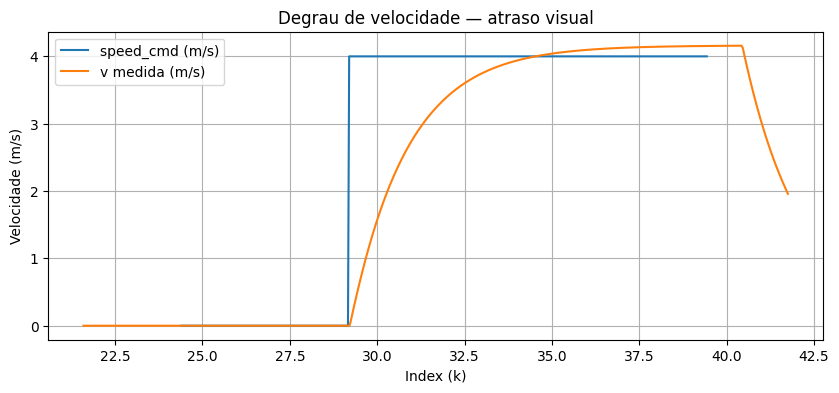

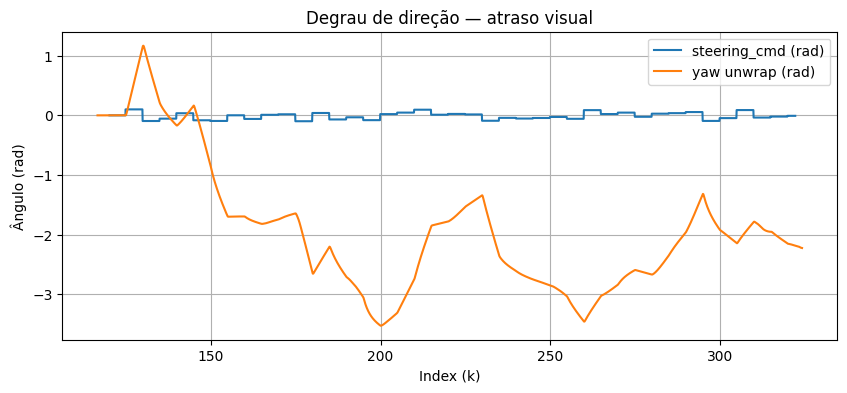

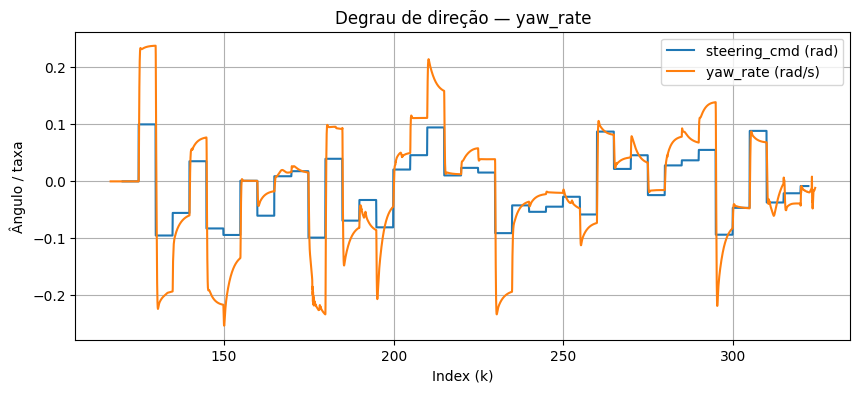

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pd.set_option('display.max_rows', None)

HZ        = 30.0
Ts        = 1.0 / HZ


# === Data files path ===
cmd_speed = "data/speed_only_30hz/speed_step_30hz_cmd_raw.csv"
odom_speed = "data/speed_only_30hz/speed_step_30hz_odom_raw.csv"
cmd_steer = "data/final/final_modelling_cmd_raw.csv"
odom_steer = "data/final/final_modelling_odom_raw.csv"


cmd_s = pd.read_csv(cmd_speed)
odom_s = pd.read_csv(odom_speed)
cmd_d = pd.read_csv(cmd_steer)
odom_d = pd.read_csv(odom_steer)
odom_d.yaw = np.unwrap(odom_d.yaw)
print("CMD ORIGINAL SPEED ONLY")
display(cmd_s)
print("OUTPUT ORIGINAL SPEED ONLY")
display(odom_s)
print("CMD ORIGINAL SPEED STEER")
display(cmd_s)
print("OUTPUT ORIGINAL SPEED STEER")
display(odom_s)

# === SPEED: entrada vs saída ===
plt.figure(figsize=(10,4))
plt.plot(cmd_s.t, cmd_s.speed, label="speed_cmd (m/s)")
plt.plot(odom_s.t, odom_s.v, label="v medida (m/s)")
plt.title("Degrau de velocidade — atraso visual")
plt.xlabel("Index (k)")
plt.ylabel("Velocidade (m/s)")
plt.legend()
plt.grid(True)
plt.show()

# === STEERING: entrada vs yaw ===
plt.figure(figsize=(10,4))
plt.plot(cmd_d.t, cmd_d.steering_angle, label="steering_cmd (rad)")
plt.plot(odom_d.t, odom_d.yaw, label="yaw unwrap (rad)")
plt.title("Degrau de direção — atraso visual")
plt.xlabel("Index (k)")
plt.ylabel("Ângulo (rad)")
plt.legend()
plt.grid(True)
plt.show()

# === STEERING: entrada vs yaw_rate ===
plt.figure(figsize=(10,4))
plt.plot(cmd_d.t, cmd_d.steering_angle, label="steering_cmd (rad)")
plt.plot(odom_d.t, odom_d.yaw_rate, label="yaw_rate (rad/s)")
plt.title("Direction step — yaw_rate")
plt.xlabel("Index (k)")
plt.ylabel("Delta / rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ===================== Utils =========================
def common_interval(t1, t2):
    return max(np.min(t1), np.min(t2)), min(np.max(t1), np.max(t2))

def resample_to_grid(t_src, data_dict, t_grid, unwrap_keys=None):
    unwrap_keys = set(unwrap_keys or [])
    t_src = np.asarray(t_src)
    order = np.argsort(t_src)
    t_sorted = t_src[order]

    out = {}
    for k, v in data_dict.items():
        v = np.asarray(v)[order]
        if k in unwrap_keys:
            v = np.unwrap(v)
        out[k] = np.interp(t_grid, t_sorted, v)

    # adiciona número da amostra e tempo como colunas explícitas
    out_df = pd.DataFrame(out)
    out_df.insert(0, "t", t_grid)
    out_df.insert(0, "k", np.arange(len(t_grid), dtype=int))
    return out_df

def finite_mask(*arrays):
    M = np.column_stack([a if a.ndim>1 else a.reshape(-1,1) for a in arrays])
    return np.isfinite(M).all(axis=1)

# ================== SPEED-ONLY (v <- speed_cmd) ==================
t0_s, tf_s = common_interval(cmd_s['t'].values, odom_s['t'].values)
tgrid_s = np.arange(t0_s, tf_s, Ts)

cmd_s_rs = resample_to_grid(
    cmd_s['t'].values,
    {
        'speed':    cmd_s['speed'].values,
        'steering_angle': cmd_s['steering_angle'].values,  # deve ser ~constante neste teste
    },
    tgrid_s
)

odom_s_rs = resample_to_grid(
    odom_s['t'].values,
    {
        'v':        odom_s['v'].values,
        'yaw':      odom_s['yaw'].values,
        'yaw_rate': odom_s['yaw_rate'].values,
        'x':        odom_s['x'].values,
        'y':        odom_s['y'].values,
    },
    tgrid_s
)

# speed_df_rs = pd.DataFrame({'t': tgrid_s, **cmd_s_rs, **odom_s_rs})
# Aplica atraso nk na ENTRADA (speed_cmd)
# speed_df_rs['speed_cmd_lag'] = speed_df_rs['speed_cmd'].shift(NK_SPEED).bfill()



# steering angle corresponds to the yaw of a virtual wheel located at the
# center of the front axle, like on a tricycle.  Positive yaw is to
# the left. (This is *not* the angle of the steering wheel inside the
# passenger compartment.)
# === Junta entradas e saídas ===
# yae eh o angulo do robo em relacao ao mundo
speed_df = pd.DataFrame({
    "t": cmd_s_rs["t"],
    "speed_cmd": cmd_s_rs["speed"],
    "steering_cmd": cmd_s_rs["steering_angle"],
    "v_measured": odom_s_rs["v"],
    "yaw":       odom_s_rs["yaw"],
    "yaw_rate": odom_s_rs["yaw_rate"],
    "x"       : odom_s_rs["x"],
    "y"       : odom_s_rs["y"]
})
print("Speed Only Dataframe")
display(speed_df)

# ================== SPEED STEER  ==================
t0_d, tf_d = common_interval(cmd_d['t'].values, odom_d['t'].values)
tgrid_d = np.arange(t0_d, tf_d, Ts)

cmd_d_rs = resample_to_grid(
    cmd_d['t'].values,
    {
        'speed':    cmd_d['speed'].values,
        'steering_angle': cmd_d['steering_angle'].values,  # deve ser ~constante neste teste
    },
    tgrid_d
)

odom_d_rs = resample_to_grid(
    odom_d['t'].values,
    {
        'v':        odom_d['v'].values,
        'yaw':      odom_d['yaw'].values,
        'yaw_rate': odom_d['yaw_rate'].values,
        'x':        odom_d['x'].values,
        'y':        odom_d['y'].values,
    },
    tgrid_d
)


steer_df = pd.DataFrame({
    "t": cmd_d_rs["t"],
    "speed_cmd": cmd_d_rs["speed"],
    "steering_cmd": cmd_d_rs["steering_angle"],
    "v_measured": odom_d_rs["v"],
    "yaw": odom_d_rs["yaw"],
    "yaw_rate": odom_d_rs["yaw_rate"],
    "x"       : odom_d_rs["x"],
    "y"       : odom_d_rs["y"]
})

print("Speed Steer Dataframe")
display(steer_df)

Speed Only Dataframe


,t,speed_cmd,steering_cmd,v_measured,yaw,yaw_rate,x,y
0,24.398000,0.0,0.0,0.000229,-0.000004,7.230685e-07,-0.018350,0.000008
1,24.431333,0.0,0.0,0.000229,-0.000004,7.243827e-07,-0.018376,0.000008
2,24.464667,0.0,0.0,0.000229,-0.000004,7.224758e-07,-0.018402,0.000008
3,24.498000,0.0,0.0,0.000229,-0.000004,7.204708e-07,-0.018428,0.000008
4,24.531333,0.0,0.0,0.000229,-0.000004,7.222719e-07,-0.018454,0.000008
...,...,...,...,...,...,...,...,...
446,39.264667,4.0,0.0,4.153525,-0.000014,7.354200e-07,34.970436,-0.000429
447,39.298000,4.0,0.0,4.153706,-0.000014,6.976666e-07,35.108856,-0.000431
448,39.331333,4.0,0.0,4.153883,-0.000014,7.024131e-07,35.247282,-0.000433
449,39.364667,4.0,0.0,4.154057,-0.000014,7.433632e-07,35.385714,-0.000435


Speed Steer Dataframe


,t,speed_cmd,steering_cmd,v_measured,yaw,yaw_rate,x,y
0,120.126000,4.000000,0.00000,0.455235,-0.000021,5.883358e-07,-0.046719,0.000040
1,120.159333,4.000000,0.00000,0.528374,-0.000021,4.991829e-07,-0.030338,0.000039
2,120.192667,4.000000,0.00000,0.600271,-0.000021,4.845740e-07,-0.011540,0.000039
3,120.226000,4.000000,0.00000,0.670947,-0.000021,4.368874e-07,0.009633,0.000039
4,120.259333,4.000000,0.00000,0.740421,-0.000021,4.045348e-07,0.033140,0.000038
...,...,...,...,...,...,...,...,...
6057,322.026000,4.615464,-0.00823,-2.542170,-2.183364,-1.878596e-02,-158.590005,-284.474192
6058,322.059333,4.615464,-0.00823,-2.547595,-2.183970,-1.885668e-02,-158.674814,-284.594798
6059,322.092667,4.615464,-0.00823,-2.552968,-2.184579,-1.893010e-02,-158.759804,-284.715505
6060,322.126000,4.615464,-0.00823,-2.558279,-2.185189,-1.900005e-02,-158.844971,-284.836308


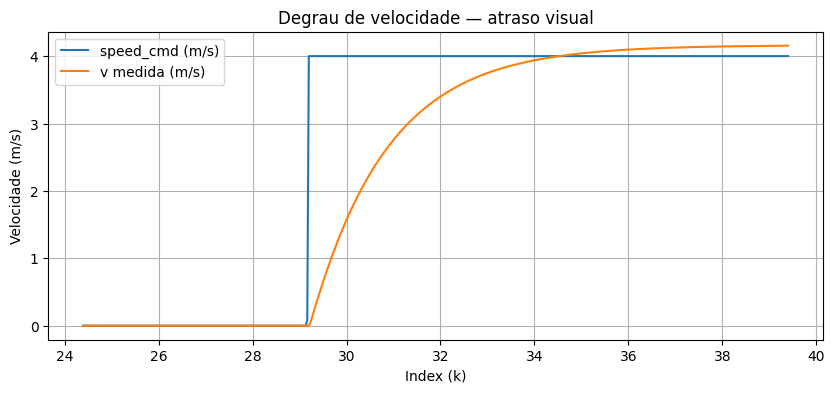

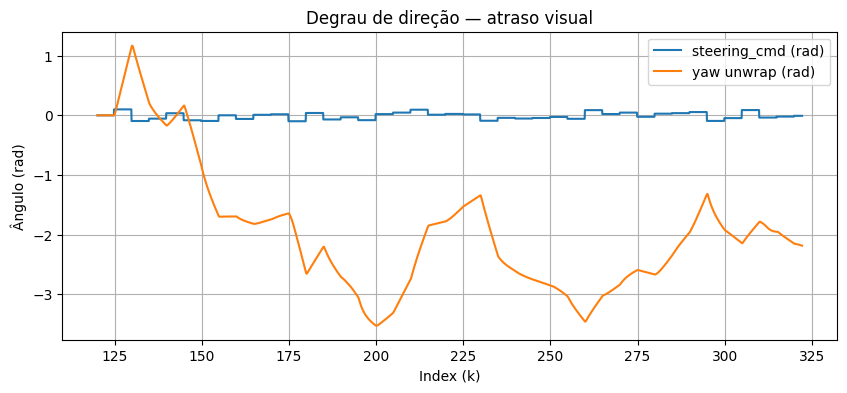

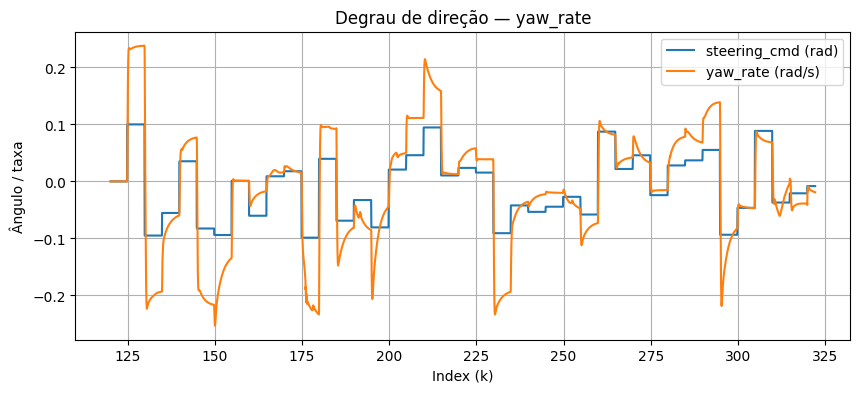

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(cmd_s_rs.t, cmd_s_rs.speed, label="speed_cmd (m/s)")
plt.plot(odom_s_rs.t, odom_s_rs.v, label="v medida (m/s)")
plt.title("Degrau de velocidade — atraso visual")
plt.xlabel("Index (k)")
plt.ylabel("Velocidade (m/s)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(cmd_d_rs.t, cmd_d_rs.steering_angle, label="steering_cmd (rad)")
plt.plot(odom_d_rs.t, odom_d_rs.yaw, label="yaw unwrap (rad)")
plt.title("Degrau de direção — atraso visual")
plt.xlabel("Index (k)")
plt.ylabel("Ângulo (rad)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(cmd_d_rs.t, cmd_d_rs.steering_angle, label="steering_cmd (rad)")
plt.plot(odom_d_rs.t, odom_d_rs.yaw_rate, label="yaw_rate (rad/s)")
plt.title("Degrau de direção — yaw_rate")
plt.xlabel("Index (k)")
plt.ylabel("Ângulo / taxa")
plt.legend()
plt.grid(True)
plt.show()

# ARX Pure Speed Model System Identification

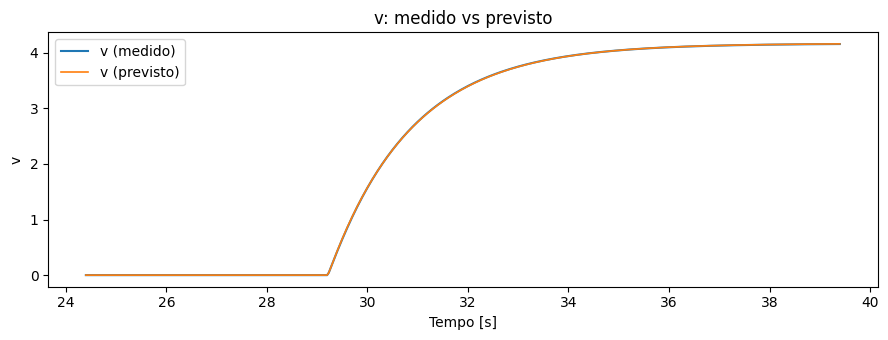

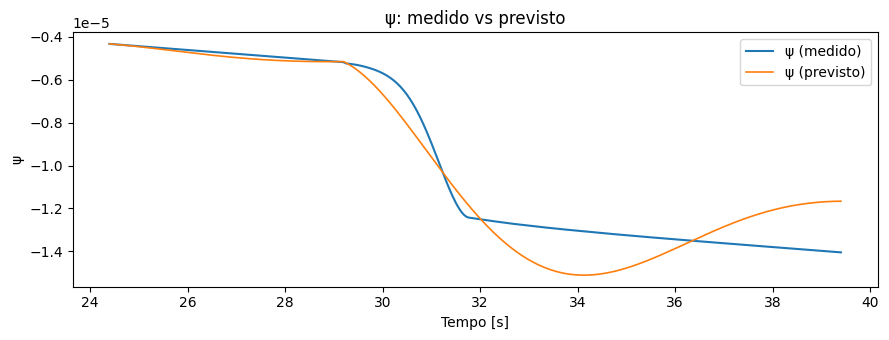

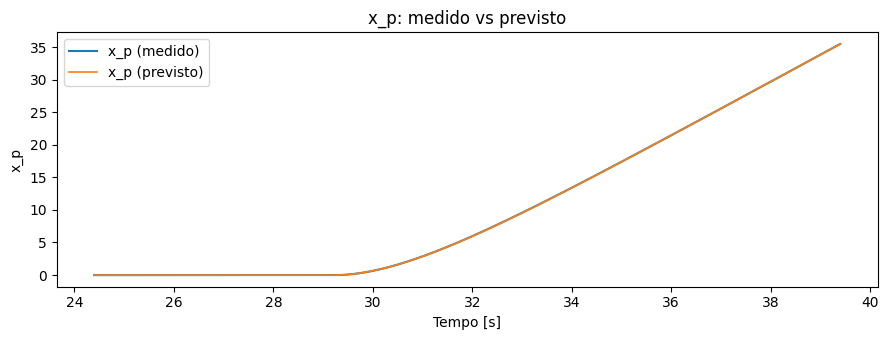

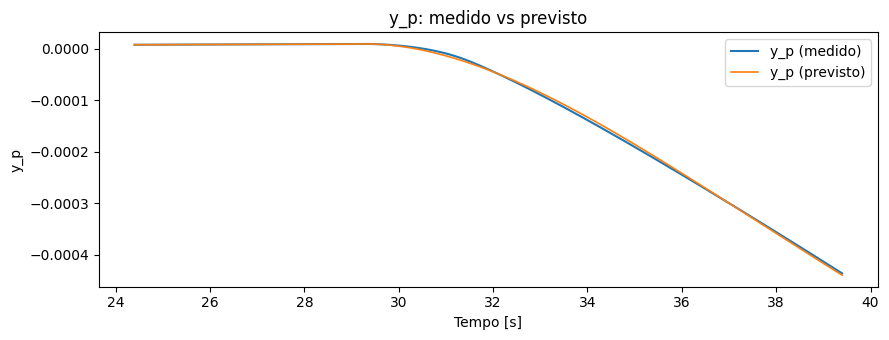

In [ ]:
from gekko import GEKKO

# generate time-series model
m = GEKKO(remote=False)

# === SPEED ONLY: ===
t = speed_df['t']
u = speed_df[['speed_cmd', 'steering_cmd']]
y = speed_df[['v_measured', 'yaw', 'x', 'y']]

# system identification
na = 2 # output coefficients
nb = 2 # input coefficients
nk = 2 # pela analise anterior eh igual a 2 para speed e 0 para steering angle
# y predicted, parameters, gain matrix
yp_sp,p_sp,K_sp = m.sysid(t,u,y,na,nb, pred='meas')

names = ['v_measured', 'yaw', 'x', 'y']
titles = {'v_measured':'v', 'yaw':'ψ', 'x':'x_p', 'y':'y_p'}

for i, name in enumerate(names):
    y_meas = y[name].to_numpy()
    y_pred = yp_sp[:, i]  # coluna i de yp

    plt.figure(figsize=(9,3.5))
    plt.plot(t, y_meas, label=f'{titles[name]} (measured)')
    plt.plot(t, y_pred, label=f'{titles[name]} (predicted)', linewidth=1.2)
    plt.xlabel('MTime [s]')
    plt.ylabel(titles[name])
    plt.title(f'{titles[name]}: measured vs predicted')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plot_{name}.png', dpi=200)
    plt.show()


In [31]:
A_sp, B_sp, C_sp = p_sp['a'], p_sp['b'], p_sp['c']
print("A shape:", A_sp.shape, "B shape:", B_sp.shape, "C shape:", C_sp.shape)
print("A ="); print(A_sp)
print("B ="); print(B_sp)
print("C ="); print(C_sp)
print("K ="); print(K_sp)

A shape: (2, 4) B shape: (4, 2, 2) C shape: (4,)
A =
[[ 1.19748111  1.98612632  1.9805609   1.99333374]
 [-0.21314866 -0.98655506 -0.98056202 -0.99335265]]
B =
[[[ 1.09299760e-02  0.00000000e+00]
  [ 5.38567662e-03  0.00000000e+00]]

 [[-9.55427341e-09  0.00000000e+00]
  [ 8.74016753e-09  0.00000000e+00]]

 [[ 1.37122319e-04  0.00000000e+00]
  [ 5.44459757e-04  0.00000000e+00]]

 [[ 7.44836097e-09  0.00000000e+00]
  [-1.23493006e-08  0.00000000e+00]]]
C =
[-2.20646085e-06 -2.11664315e-09 -6.00391776e-07  2.39481555e-10]
K =
[[ 1.00276037e+00  0.00000000e+00]
 [-7.59528475e-06  0.00000000e+00]
 [ 6.89738729e+01  0.00000000e+00]
 [-1.03692635e-03  0.00000000e+00]]


In [ ]:
na, ny = A_sp.shape
def ar_roots_from_gekko(A):
    roots_per_output = []
    for i in range(ny):
        a = A[:, i]                    # [a1, a2, ..., ana] da saída i
        coeffs = np.r_[1.0, -a]        # z^na - a1 z^{na-1} - ... - a_na
        r = np.roots(coeffs)
        roots_per_output.append(r)
    return roots_per_output

roots_sp = ar_roots_from_gekko(A_sp)

for i, r in enumerate(roots_sp):
    mags = np.abs(r)
    print(f"Output {i}: roots = {r}, |λ| = {mags}, Stable? {np.all(mags < 1.0)}")


Saída 0: raízes = [0.97997748 0.21750363], |λ| = [0.97997748 0.21750363], estável? True
Saída 1: raízes = [0.99306316+0.01950956j 0.99306316-0.01950956j], |λ| = [0.99325478 0.99325478], estável? True
Saída 2: raízes = [0.99994263 0.98061828], |λ| = [0.99994263 0.98061828], estável? True
Saída 3: raízes = [0.99666687+0.00279211j 0.99666687-0.00279211j], |λ| = [0.99667078 0.99667078], estável? True


# ARX Speed Steer model SI

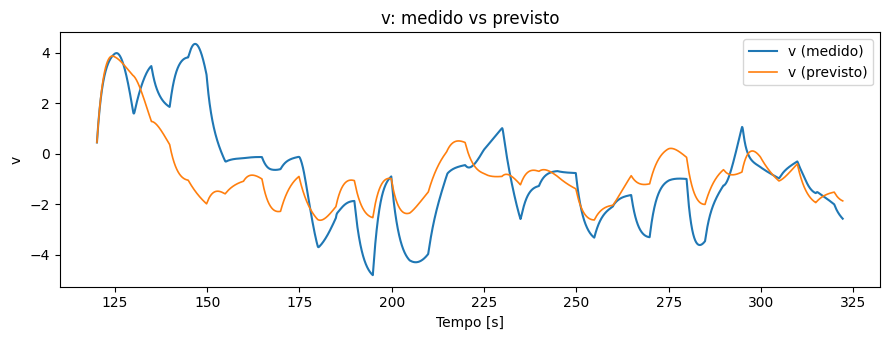

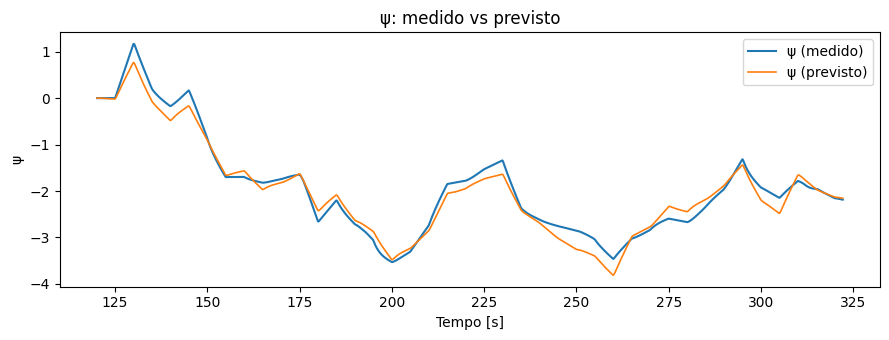

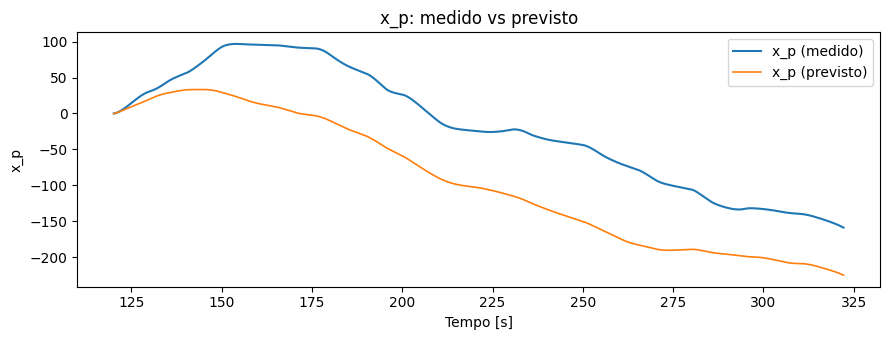

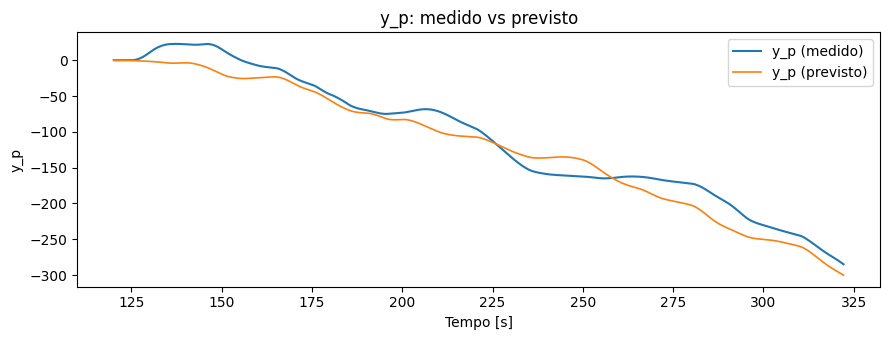

In [ ]:
# === SPEED STEER: ===
t_st = steer_df['t']
u_st = steer_df[['speed_cmd', 'steering_cmd']]
y_st = steer_df[['v_measured', 'yaw', 'x', 'y']]

# system identification
na = 3 # output coefficients
nb = 2 # input coefficients
nk = 2 # looking at the data it should be two
# y predicted, parameters, gain matrix
yp_st,p_st,K_st = m.sysid(t_st,u_st,y_st,na,nb,nk=nk,pred='meas')

names = ['v_measured', 'yaw', 'x', 'y']
titles = {'v_measured':'v', 'yaw':'ψ', 'x':'x_p', 'y':'y_p'}

for i, name in enumerate(names):
    y_meas = y_st[name].to_numpy()
    y_pred = yp_st[:, i]  

    plt.figure(figsize=(9,3.5))
    plt.plot(t_st, y_meas, label=f'{titles[name]} (medido)')
    plt.plot(t_st, y_pred, label=f'{titles[name]} (previsto)', linewidth=1.2)
    plt.xlabel('Tempo [s]')
    plt.ylabel(titles[name])
    plt.title(f'{titles[name]}: medido vs previsto')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plot_{name}.png', dpi=200)
    plt.show()


In [34]:
A_st, B_st, C_st = p_st['a'], p_st['b'], p_st['c']
print("A shape:", A_st.shape, "B shape:", B_st.shape, "C shape:", C_st.shape)
print("A ="); print(A_st)
print("B ="); print(B_st)
print("C ="); print(C_st)
print("K ="); print(K_st)

A shape: (3, 4) B shape: (4, 4, 2) C shape: (4,)
A =
[[ 2.31217167  2.84526402  2.9653192   2.99175188]
 [-1.63434081 -2.69376322 -2.93067853 -2.98354702]
 [ 0.32213804  0.84849891  0.96535934  0.99179515]]
B =
[[[-7.89985040e-03 -3.21030900e-03]
  [ 9.40154363e-03  1.55027260e-02]
  [-9.13216500e-04 -9.38073370e-03]
  [-5.89288393e-04 -2.17655105e-03]]

 [[-6.83977254e-06  1.35585826e-03]
  [ 3.78860055e-05  3.94729565e-03]
  [-3.64481297e-05 -3.30290616e-03]
  [ 4.62413091e-06 -1.82573980e-03]]

 [[-1.52612523e-04  4.96497236e-05]
  [-5.25047885e-06  2.40652734e-04]
  [ 1.41421061e-04  2.54055321e-05]
  [ 1.39323401e-05 -2.18151938e-04]]

 [[-1.39582086e-04  3.92627331e-04]
  [-3.17776231e-05  6.04933314e-05]
  [ 1.53109150e-04 -3.96788671e-04]
  [ 1.87571981e-05 -5.45105694e-05]]]
C =
[-2.72973974e-05  2.37925592e-06  6.31961931e-06 -3.09854331e-06]
K =
[[-1.23510785e-02  2.58143774e+00]
 [-2.54057437e+00  1.31542210e+02]
 [ 8.52264314e+00 -7.64523466e+01]
 [-1.48220939e+00 -1.22966

In [ ]:
na, ny = A_st.shape
def ar_roots_from_gekko(A):
    roots_per_output = []
    for i in range(ny):
        a = A[:, i]                    # [a1, a2, ..., ana] da saída i
        coeffs = np.r_[1.0, -a]        # z^na - a1 z^{na-1} - ... - a_na
        r = np.roots(coeffs)
        roots_per_output.append(r)
    return roots_per_output

roots_st = ar_roots_from_gekko(A_st)

for i, r in enumerate(roots_st):
    mags = np.abs(r)
    print(f"Output {i}: roots = {r}, |λ| = {mags}, Stable? {np.all(mags < 1.0)}")

Saída 0: raízes = [0.99551243 0.98970209 0.32695715], |λ| = [0.99551243 0.98970209 0.32695715], estável? True
Saída 1: raízes = [0.99991232 0.97518694 0.87016476], |λ| = [0.99991232 0.97518694 0.87016476], estável? True
Saída 2: raízes = [1.00011318 0.99868329 0.96652273], |λ| = [1.00011318 0.99868329 0.96652273], estável? False
Saída 3: raízes = [0.99582147+0.00516895j 0.99582147-0.00516895j 1.00010894+0.j        ], |λ| = [0.99583488 0.99583488 1.00010894], estável? False


# Linearized Bycicle Model

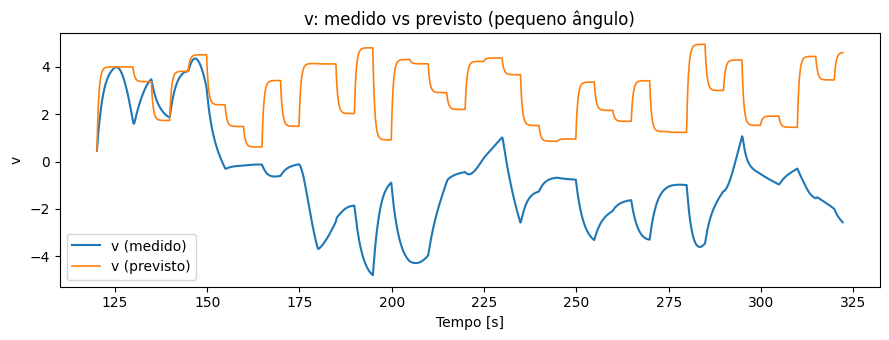

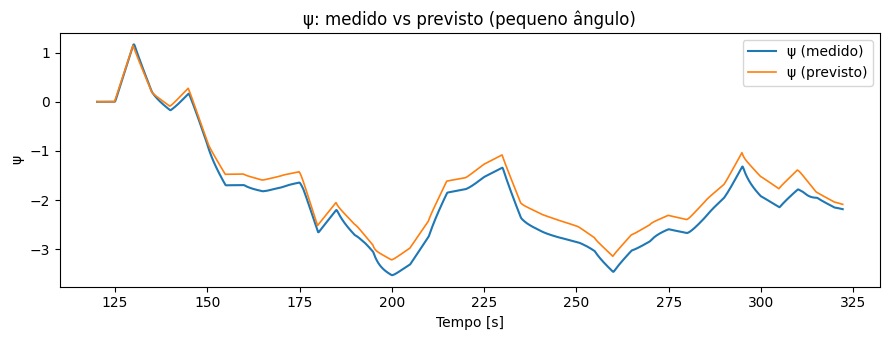

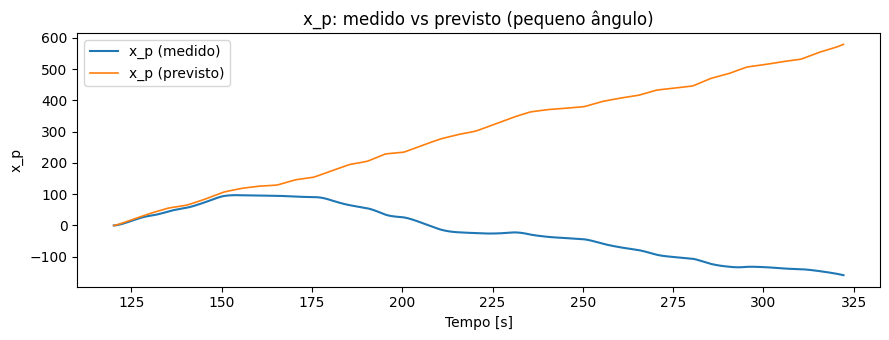

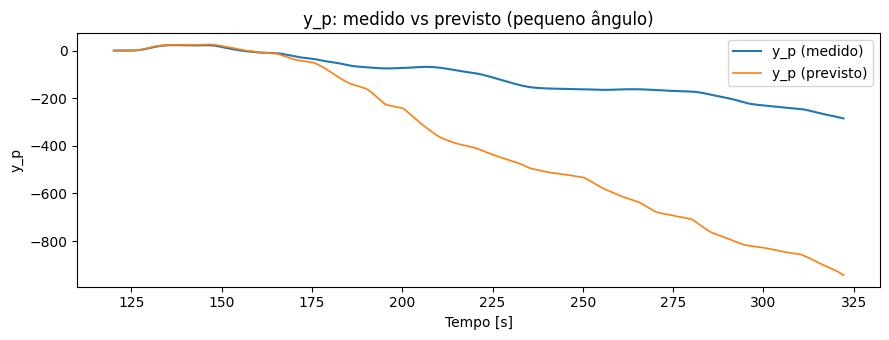

In [ ]:
L = 1.75       # from the manual we get 1.75
tau_v = 0.5   

# --- amostragem ---
Ts = np.median(np.diff(t_st))

# --- sinais no seu padrão ---
v_meas = y_st['v_measured'].to_numpy()
yaw    = y_st['yaw'].to_numpy()    
x_m    = y_st['x'].to_numpy()
y_m    = y_st['y'].to_numpy()

delta  = u_st['steering_cmd'].to_numpy()   # [rad]
spd    = u_st['speed_cmd'].to_numpy()      # [m/s]

X_meas = np.stack([v_meas, yaw, x_m, y_m], axis=1)  # [v, psi, x, y]
U_meas = np.stack([spd, delta], axis=1)             # [speed_cmd, steering_cmd]

def f_small_angle(x, u):
    v, psi, xg, yg = x
    spd_u, delt_u  = u
    v_dot   = (spd_u - v)/tau_v
    psi_dot = (v/L)*delt_u
    x_dot   = v
    y_dot   = v*psi
    return np.array([v_dot, psi_dot, x_dot, y_dot], dtype=float)

Xp = np.zeros_like(X_meas)
Xp[0] = X_meas[0]

for k in range(len(t_st)-1):
    Xp[k+1] = Xp[k] + Ts * f_small_angle(Xp[k], U_meas[k])

yp_st = np.zeros_like(X_meas)
yp_st[:,0] = Xp[:,0]  # v
yp_st[:,1] = Xp[:,1]  # yaw
yp_st[:,2] = Xp[:,2]  # x
yp_st[:,3] = Xp[:,3]  # y

names  = ['v_measured', 'yaw', 'x', 'y']
titles = {'v_measured':'v', 'yaw':'ψ', 'x':'x_p', 'y':'y_p'}

for i, name in enumerate(names):
    y_meas = y_st[name].to_numpy()
    y_pred = yp_st[:, i]

    plt.figure(figsize=(9,3.5))
    plt.plot(t_st, y_meas, label=f'{titles[name]} (Measured)')
    plt.plot(t_st, y_pred, label=f'{titles[name]} (Predicted)', linewidth=1.2)
    plt.xlabel('Time [s]')
    plt.ylabel(titles[name])
    plt.title(f'{titles[name]}: measured vs predicted (small angles)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plot_{name}_lin_small.png', dpi=200)
    plt.show()

The robot has the speed not on its body frame, but instead on the world one, so we can't just apply the bicycle model, but need to apply a rotation matrix to it first 

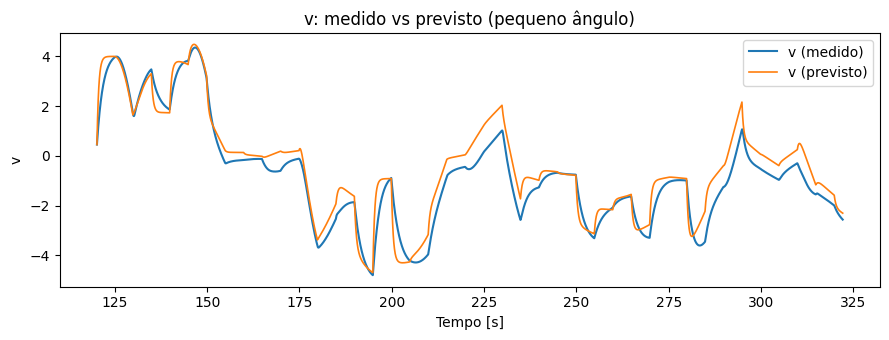

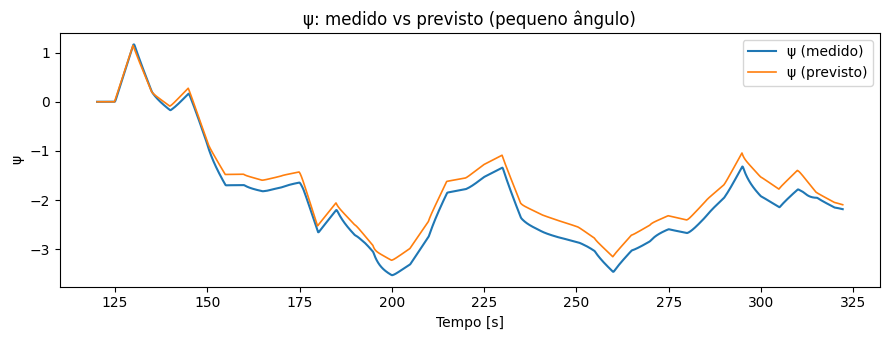

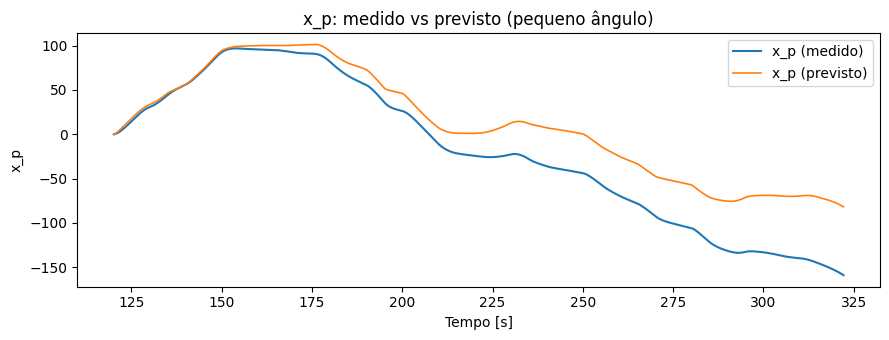

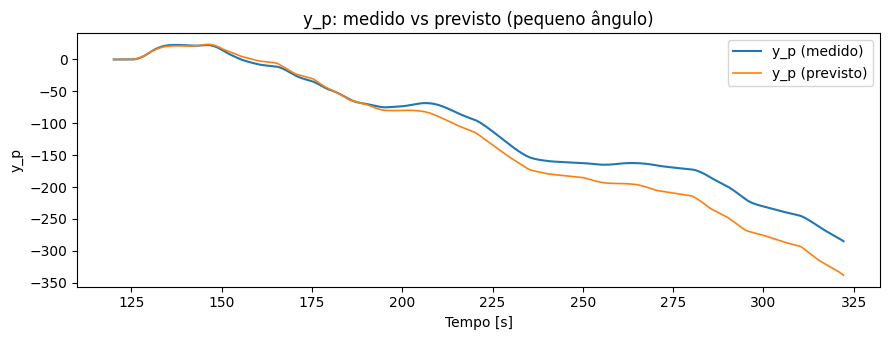

In [ ]:
L = 1.75       
tau_v = 0.5    

Ts = np.median(np.diff(t_st))


v_meas = y_st['v_measured'].to_numpy()

yaw    = y_st['yaw'].to_numpy()    
x_m    = y_st['x'].to_numpy()
y_m    = y_st['y'].to_numpy()

delta  = u_st['steering_cmd'].to_numpy()   # [rad]
spd    = u_st['speed_cmd'].to_numpy()      # [m/s]


X_meas = np.stack([v_meas, yaw, x_m, y_m], axis=1)  # [v, psi, x, y]
U_meas = np.stack([spd, delta], axis=1)             # [speed_cmd, steering_cmd]


def f_small_angle(x, u):
    v, psi, xg, yg = x           
    spd_u, delt_u  = u          

    # speeds ast the robot frame (with no lateral speed): [v, 0]
    vx_b = v
    vy_b = 0.0

    # rotation body->woorld
    c, s = np.cos(psi), np.sin(psi)
    vx_w =  c*vx_b - s*vy_b      # = v*cos(psi)
    vy_w =  s*vx_b + c*vy_b      # = v*sin(psi)

    # dinâmicas
    v_dot   = (spd_u - v)/tau_v
    psi_dot = (v/L)*np.tan(delt_u)  
    x_dot   = vx_w
    y_dot   = vy_w

    return np.array([v_dot, psi_dot, x_dot, y_dot], dtype=float)
    
Xp = np.zeros_like(X_meas)
Xp[0] = X_meas[0]

for k in range(len(t_st)-1):
    Xp[k+1] = Xp[k] + Ts * f_small_angle(Xp[k], U_meas[k])


yp_st = np.zeros_like(X_meas)
v_long_pred = Xp[:,0]               
psi_pred    = Xp[:,1]


v_pred_plot = v_long_pred * np.cos(psi_pred) 

yp_st[:,0] = v_pred_plot
yp_st[:,1] = Xp[:,1]  # yaw
yp_st[:,2] = Xp[:,2]  # x
yp_st[:,3] = Xp[:,3]  # y

names  = ['v_measured', 'yaw', 'x', 'y']
titles = {'v_measured':'v', 'yaw':'ψ', 'x':'x_p', 'y':'y_p'}

for i, name in enumerate(names):
    y_meas = y_st[name].to_numpy()
    y_pred = yp_st[:, i]

    plt.figure(figsize=(9,3.5))
    plt.plot(t_st, y_meas, label=f'{titles[name]} (medido)')
    plt.plot(t_st, y_pred, label=f'{titles[name]} (previsto)', linewidth=1.2)
    plt.xlabel('Tempo [s]')
    plt.ylabel(titles[name])
    plt.title(f'{titles[name]}: medido vs previsto (pequeno ângulo)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'plot_{name}_lin_small.png', dpi=200)
    plt.show()

vx = np.gradient(y_st['x'].to_numpy(), t_st)
vy = np.gradient(y_st['y'].to_numpy(), t_st)
psi = y_st['yaw'].to_numpy()


# Identifying parameters using nonlinear greybox

In [40]:
import numpy as np
from gekko import GEKKO

def identify_bicycle_greybox(t, speed_cmd, steer_cmd,
                             v_meas, yaw_meas, x_meas, y_meas,
                             L_init=1.75, tau_v_init=0.5):
    t = np.asarray(t); t = t - t[0]

    m = GEKKO(remote=False)
    m.time = list(t)

    # Inputs (known)
    u_v = m.Param(value=list(speed_cmd))
    u_d = m.Param(value=list(steer_cmd))

    # Measured outputs as Params
    v_p   = m.Param(value=list(v_meas))
    psi_p = m.Param(value=list(yaw_meas))
    x_p   = m.Param(value=list(x_meas))
    y_p   = m.Param(value=list(y_meas))

    # Unknown constants to estimate (FVs)
    tau_v = m.FV(value=tau_v_init, lb=0.05, ub=5.0);  tau_v.STATUS  = 1
    L_eff = m.FV(value=L_init,     lb=1.0,  ub=4.0);  L_eff.STATUS  = 1
    k_del = m.FV(value=1.0,        lb=0.5,  ub=2.0);  k_del.STATUS  = 1  # steering gain / ratio

    # States
    v   = m.Var(value=float(v_meas[0]))
    psi = m.Var(value=float(yaw_meas[0]))
    xg  = m.Var(value=float(x_meas[0]))
    yg  = m.Var(value=float(y_meas[0]))

    # Nonlinear dynamics (keep smooth)
    m.Equation(v.dt()   == (u_v - v)/tau_v)
    m.Equation(psi.dt() == (v/L_eff) * m.tan(k_del*u_d))
    m.Equation(xg.dt()  == v*m.cos(psi))
    m.Equation(yg.dt()  == v*m.sin(psi))

    # Fit objective (weights are tunable)
    wv, wpsi, wx, wy = 1.0, 5.0, 1.0, 1.0
    m.Minimize(wv  * (v   - v_p)**2)
    m.Minimize(wpsi* (psi - psi_p)**2)
    m.Minimize(wx  * (xg  - x_p)**2 + wy*(yg - y_p)**2)
    # tiny regularization to keep params near initials
    m.Minimize(1e-6 * ((tau_v-tau_v_init)**2 + (L_eff-L_init)**2 + (k_del-1.0)**2))

    m.options.IMODE   = 6        # dynamic estimation over full dataset
    m.options.NODES   = 3
    m.options.SOLVER  = 3        # IPOPT
    m.options.SCALING = 1
    m.options.MAX_ITER = 300

    m.solve(disp=False)

    return {
        'tau_v' : float(tau_v.VALUE[0]),
        'L_eff' : float(L_eff.VALUE[0]),
        'k_del' : float(k_del.VALUE[0])
    }


In [41]:
pars = identify_bicycle_greybox(t_st, spd, delta, v_meas, yaw, x_m, y_m)

display(pars)

# Non linear graybox System Identification

In [ ]:
def identify_bicycle_greybox_plus(t, speed_cmd, steer_cmd,
                                  v_meas, yaw_meas, x_meas, y_meas,
                                  L0=1.75, tau_v0=0.5):
    """Estimativa de parâmetros com atuadores + slip β(δ) e viés de ψ."""
    t = np.asarray(t, float); t = t - t[0]
    m = GEKKO(remote=False); m.time = list(t)

    u_v = m.Param(value=list(speed_cmd))
    u_d = m.Param(value=list(steer_cmd))


    v_p   = m.Param(value=list(v_meas))
    psi_p = m.Param(value=list(yaw_meas))
    x_p   = m.Param(value=list(x_meas))
    y_p   = m.Param(value=list(y_meas))

    tau_acc  = m.FV(value=0.20, lb=0.02, ub=3.0);  tau_acc.STATUS  = 1
    tau_str  = m.FV(value=0.15, lb=0.02, ub=3.0);  tau_str.STATUS  = 1
    tau_v    = m.FV(value=tau_v0, lb=0.05, ub=5.0);tau_v.STATUS    = 1
    L_eff    = m.FV(value=L0,    lb=1.0,  ub=4.0); L_eff.STATUS    = 1
    k_del    = m.FV(value=1.0,   lb=0.5,  ub=2.0); k_del.STATUS    = 1
    k_b1     = m.FV(value=0.0,   lb=-0.6, ub=0.6); k_b1.STATUS     = 1
    k_b3     = m.FV(value=0.0,   lb=-1.0, ub=1.0); k_b3.STATUS     = 1
    psi_bias = m.FV(value=0.0,   lb=-0.3, ub=0.3); psi_bias.STATUS = 1

    v   = m.Var(value=float(v_meas[0]), lb=-10, ub=10)
    psi = m.Var(value=float(yaw_meas[0]))
    xg  = m.Var(value=float(x_meas[0]))
    yg  = m.Var(value=float(y_meas[0]))
    uva = m.Var(value=float(v_meas[0]), lb=-10, ub=10)    
    da  = m.Var(value=0.0,               lb=-0.8, ub=0.8) 


    m.Equation(uva.dt() == (u_v - uva)/tau_acc)
    m.Equation(da.dt()  == (u_d - da)/tau_str)


    m.Equation(v.dt()   == (uva - v)/tau_v)
    m.Equation(psi.dt() == (v/L_eff) * m.tan(k_del*da))
    beta = m.Intermediate(k_b1*da + k_b3*da**3)
    m.Equation(xg.dt()  == v*m.cos(psi + psi_bias + beta))
    m.Equation(yg.dt()  == v*m.sin(psi + psi_bias + beta))


    wv, wpsi, wxy = 5.0, 10.0, 0.2
    # m.Minimize(wv  * (v   - v_p)**2)
    vx_hat_m = m.Intermediate( v*m.cos(psi + psi_bias + beta) )
    m.Minimize(wv * (vx_hat_m - v_p)**2)
    m.Minimize(wpsi* (psi - psi_p)**2)
    m.Minimize(wxy * ((xg - x_p)**2 + (yg - y_p)**2))
    m.Minimize(1e-6*((tau_acc-0.2)**2 + (tau_str-0.15)**2 + (tau_v-tau_v0)**2 +
                     (L_eff-L0)**2 + (k_del-1.0)**2 + k_b1**2 + k_b3**2 + psi_bias**2))

    # Solver
    m.options.IMODE=6; m.options.NODES=3; m.options.SOLVER=3
    m.options.SCALING=1; m.options.MAX_ITER=300
    m.solver_options = ['print_level 0','max_iter 300','tol 1e-6','acceptable_tol 1e-4']

    m.solve(disp=False)

    pars = {
        'tau_acc': float(tau_acc.VALUE[0]),
        'tau_str': float(tau_str.VALUE[0]),
        'tau_v'  : float(tau_v.VALUE[0]),
        'L_eff'  : float(L_eff.VALUE[0]),
        'k_del'  : float(k_del.VALUE[0]),
        'k_b1'   : float(k_b1.VALUE[0]),
        'k_b3'   : float(k_b3.VALUE[0]),
        'psi_bias':float(psi_bias.VALUE[0]),
    }

    v_hat   = np.array(list(v.VALUE),   dtype=float)
    psi_hat = np.array(list(psi.VALUE), dtype=float)
    x_hat   = np.array(list(xg.VALUE),  dtype=float)
    y_hat   = np.array(list(yg.VALUE),  dtype=float)
    da_hat  = np.fromiter(da.VALUE,   dtype=float)

    beta_hat = pars['k_b1']*da_hat + pars['k_b3']*(da_hat**3)
    vx_hat   = v_hat * np.cos(psi_hat + pars['psi_bias'] + beta_hat)

    return pars, (v_hat, psi_hat, x_hat, y_hat, vx_hat)

In [43]:
t        = np.asarray(t_st)
speed    = u_st['speed_cmd'].to_numpy().astype(float)
steer    = u_st['steering_cmd'].to_numpy().astype(float)
v_meas   = y_st['v_measured'].to_numpy().astype(float)
vx_meas  = y_st['v_measured'].to_numpy().astype(float)      # isto é v_x no MUNDO
yaw_meas = np.unwrap(y_st['yaw'].to_numpy().astype(float))
x_meas   = y_st['x'].to_numpy().astype(float)
y_meas   = y_st['y'].to_numpy().astype(float)

pars, (v_hat, psi_hat, x_hat, y_hat, vx_hat) = identify_bicycle_greybox_plus(
    t, speed, steer, v_meas, yaw_meas, x_meas, y_meas,
    L0=1.75, tau_v0=0.5
)
print(pars)

{'tau_acc': 0.85716492375, 'tau_str': 0.4119392892, 'tau_v': 0.43809159234, 'L_eff': 2.8168931892, 'k_del': 1.666545649, 'k_b1': 0.6, 'k_b3': 1.0, 'psi_bias': -0.020810914222}


Parâmetros: {'tau_acc': 0.85716492375, 'tau_str': 0.4119392892, 'tau_v': 0.43809159234, 'L_eff': 2.8168931892, 'k_del': 1.666545649, 'k_b1': 0.6, 'k_b3': 1.0, 'psi_bias': -0.020810914222}
RMSE v:   4.367 m/s
RMSE ψ:   0.060 rad
RMSE x:   1.219 m
RMSE y:   0.799 m


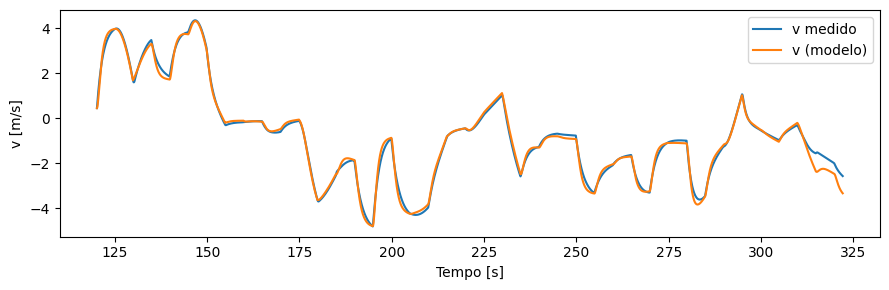

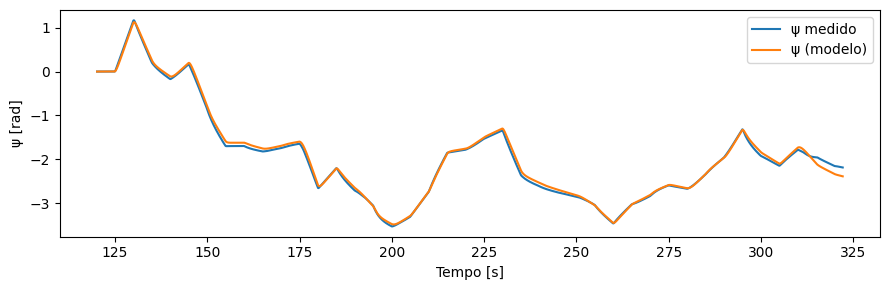

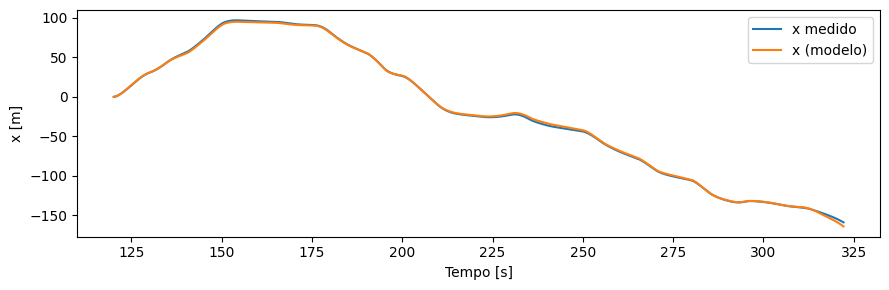

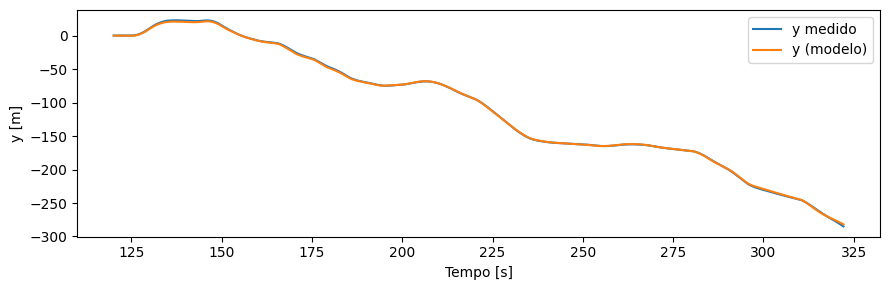

In [ ]:
# --- 1) Preparar dados (mesmo tamanho; yaw des-enrolado) ---
t        = np.asarray(t_st)
speed    = u_st['speed_cmd'].to_numpy().astype(float)
steer    = u_st['steering_cmd'].to_numpy().astype(float)
v_meas   = y_st['v_measured'].to_numpy().astype(float)
yaw_meas = np.unwrap(y_st['yaw'].to_numpy().astype(float))
x_meas   = y_st['x'].to_numpy().astype(float)
y_meas   = y_st['y'].to_numpy().astype(float)

# (opcional) máscara para remover NaN / inf
mask = np.isfinite(t*0+1) & np.isfinite(speed) & np.isfinite(steer) \
       & np.isfinite(v_meas) & np.isfinite(yaw_meas) \
       & np.isfinite(x_meas) & np.isfinite(y_meas)
t, speed, steer, v_meas, yaw_meas, x_meas, y_meas = \
    t[mask], speed[mask], steer[mask], v_meas[mask], yaw_meas[mask], x_meas[mask], y_meas[mask]

# (opcional) usar só um trecho para testar
idx = slice(0, len(t))  # ex.: slice(100, 2000)

# --- 2) Identificar e obter predições ---
# pars, (v_hat, psi_hat, x_hat, y_hat, vx_hat) = identify_bicycle_greybox_plus(
#     t[idx], speed[idx], steer[idx], v_meas[idx], yaw_meas[idx], x_meas[idx], y_meas[idx],
#     L0=1.75, tau_v0=0.5
# )
print('Parâmetros:', pars)

# --- 3) Métricas simples (RMSE) ---
def rmse(a,b): 
    a,b = np.asarray(a), np.asarray(b)
    return float(np.sqrt(np.mean((a-b)**2)))
print(f'RMSE v:   {rmse(v_meas[idx], v_hat):.3f} m/s')
print(f'RMSE ψ:   {rmse(yaw_meas[idx], psi_hat):.3f} rad')
print(f'RMSE x:   {rmse(x_meas[idx], x_hat):.3f} m')
print(f'RMSE y:   {rmse(y_meas[idx], y_hat):.3f} m')

# --- 4) Plots de validação ---
tt = t[idx]

plt.figure(figsize=(9,3))
plt.plot(tt, v_meas[idx], label='v measured')
plt.plot(tt, vx_hat,       label='v (model)')
plt.xlabel('Time [s]'); plt.ylabel('v [m/s]'); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3))
plt.plot(tt, yaw_meas[idx], label='ψ measured')
plt.plot(tt, psi_hat,       label='ψ (model)')
plt.xlabel('Time [s]'); plt.ylabel('ψ [rad]'); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3))
plt.plot(tt, x_meas[idx], label='x measured')
plt.plot(tt, x_hat,       label='x (model)')
plt.xlabel('Time [s]'); plt.ylabel('x [m]'); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3))
plt.plot(tt, y_meas[idx], label='y measured')
plt.plot(tt, y_hat,       label='y (model)')
plt.xlabel('Time [s]'); plt.ylabel('y [m]'); plt.legend(); plt.tight_layout(); plt.show()


# MPC Controller

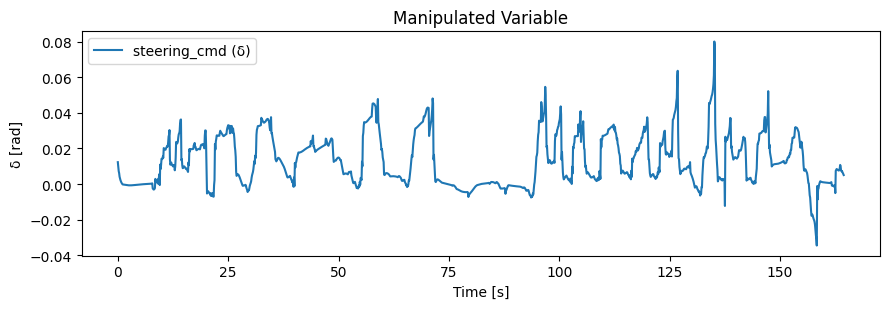

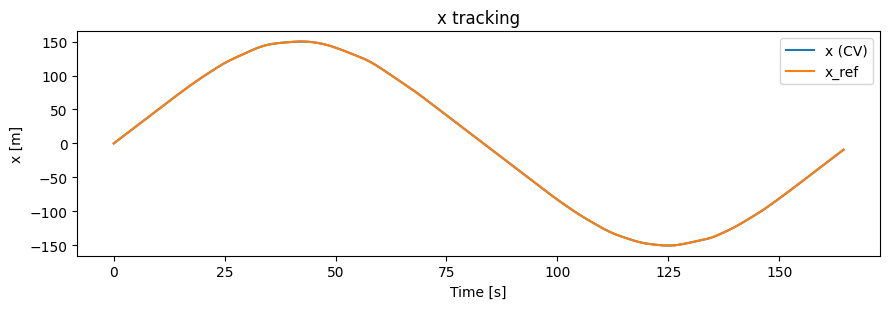

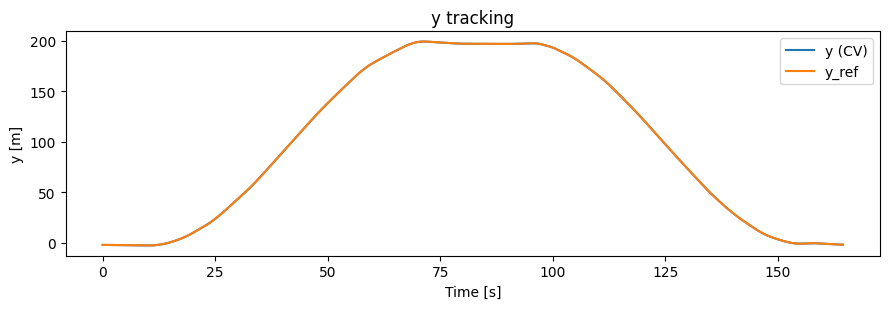

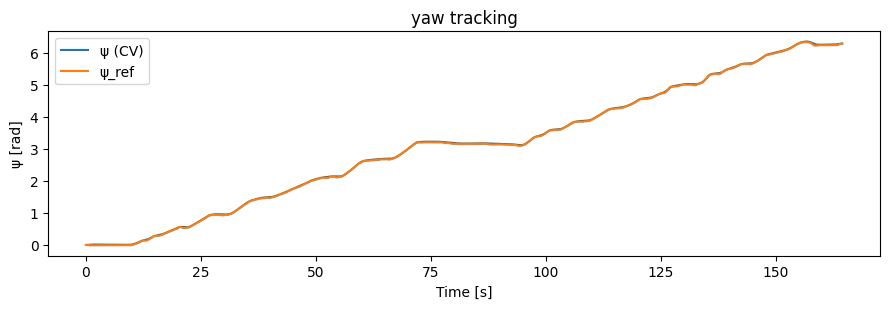

In [ ]:
# --------------- 1) Load CSV and build time-aligned references ---------------
def load_wp_csv_make_refs(csv_path, v_fixed=5.0, Ts=0.1, use_csv_yaw=True):
    """
    csv columns: [x_world, y_world, yaw, v_world, vref_body]
    We discard the speeds and create time from arc-length with constant v_fixed.
    Returns t, x_ref, y_ref, psi_ref, v_cmd (constant)
    """
    df = pd.read_csv(csv_path, header=None)
    df.columns = ['x','y','psi','v_world','vref_body']

    x = df['x'].to_numpy(dtype=float)
    y = df['y'].to_numpy(dtype=float)

    if use_csv_yaw and 'psi' in df:
        psi = np.unwrap(df['psi'].to_numpy(dtype=float))
    else:
        dx = np.gradient(x)
        dy = np.gradient(y)
        psi = np.unwrap(np.arctan2(dy, dx))

    # arc-length
    ds = np.hypot(np.diff(x), np.diff(y))
    s  = np.concatenate(([0.0], np.cumsum(ds)))

    # time from constant speed
    v_fixed = float(v_fixed)
    t_wp = s / max(v_fixed, 1e-6)

    # resample to uniform Ts
    if Ts is None:
        Ts = float(np.median(np.diff(t_wp[t_wp>0]))) if len(t_wp)>1 else 0.1
    t = np.arange(0.0, t_wp[-1] + 0.5*Ts, Ts)


    x_ref   = np.interp(t, t_wp, x)
    y_ref   = np.interp(t, t_wp, y)
    psi_ref = np.interp(t, t_wp, psi)   

    v_cmd = np.full_like(t, v_fixed, dtype=float)
    return t, x_ref, y_ref, psi_ref, v_cmd, Ts

# --------------- 2) Steering-only MPC builder (tracks x,y,psi) ---------------
def mpc_xypsi_steer_only(t, pars, x_ref, y_ref, psi_ref, v_cmd,
                         Ts=None, Np=20,
                         steer_bounds=(-0.6,0.6), dmax_steer=0.20,
                         w_pos=1.0, w_yaw=0.2, w_u=1e-6):
    """
    Steering-only MPC that tracks (x, y, psi). Speed is a known input v_cmd(t).
    'pars' comes from grey-box identification; if None, defaults are used.
    """
    if Ts is None:
        Ts = float(np.median(np.diff(t)))
    H = np.linspace(0.0, Np*Ts, Np+1)

    # defaults if pars not given
    if pars is None:
        pars = dict(tau_acc=0.20, tau_str=0.15, tau_v=0.5, L_eff=1.75,
                    k_del=1.0, k_b1=0.0, k_b3=0.0, psi_bias=0.0)

    m = GEKKO(remote=False)
    m.time = H
    m.options.IMODE   = 6
    m.options.NODES   = 2
    m.options.SOLVER  = 3
    m.options.SCALING = 1
    m.options.MAX_ITER = 120
    m.solver_options  = ['print_level 0','max_iter 120','tol 1e-6','acceptable_tol 1e-4','linear_solver ma27']

    # fixed params
    tau_acc = m.Param(value=pars['tau_acc'])
    tau_str = m.Param(value=pars['tau_str'])
    tau_v   = m.Param(value=pars['tau_v'])
    L_eff   = m.Param(value=pars['L_eff'])
    k_del   = m.Param(value=pars['k_del'])
    k_b1    = m.Param(value=pars['k_b1'])
    k_b3    = m.Param(value=pars['k_b3'])
    psi_b   = m.Param(value=pars['psi_bias'])

    # horizon references and known speed command
    x_sp   = m.Param(value=x_ref[:Np+1].copy())
    y_sp   = m.Param(value=y_ref[:Np+1].copy())
    psi_sp = m.Param(value=psi_ref[:Np+1].copy())
    u_vp   = m.Param(value=v_cmd[:Np+1].copy())

    # states
    v   = m.Var(value=0.0, lb=-10, ub=10)
    psi = m.Var(value=float(psi_ref[0]))
    xg  = m.Var(value=float(x_ref[0]))
    yg  = m.Var(value=float(y_ref[0]))
    uva = m.Var(value=v_cmd[0], lb=-10, ub=10)     # speed actuator
    da  = m.Var(value=0.0,     lb=steer_bounds[0], ub=steer_bounds[1])

    # MV: steering command
    delt_u = m.MV(value=0.0, lb=steer_bounds[0], ub=steer_bounds[1])
    delt_u.STATUS = 1
    delt_u.DMAX   = dmax_steer
    delt_u.DCOST  = 1.0

    # dynamics
    m.Equation(uva.dt() == (u_vp - uva)/tau_acc)
    m.Equation(da.dt()  == (delt_u - da)/tau_str)

    m.Equation(v.dt()   == (uva - v)/tau_v)
    m.Equation(psi.dt() == (v/L_eff) * m.tan(k_del*da))
    beta = m.Intermediate(k_b1*da + k_b3*da**3)
    m.Equation(xg.dt()  == v*m.cos(psi + psi_b + beta))
    m.Equation(yg.dt()  == v*m.sin(psi + psi_b + beta))

    # objective
    ex = m.Intermediate(xg - x_sp)
    ey = m.Intermediate(yg - y_sp)
    dpsi = m.Intermediate(psi - psi_sp)  
    m.Minimize(w_pos*(ex**2 + ey**2))
    m.Minimize(w_yaw*(1 - m.cos(dpsi)))
    m.Minimize(w_u*(delt_u**2))

    def set_refs_and_speed(xseg, yseg, psiseg, vseg):
        x_sp.value   = xseg[:Np+1]
        y_sp.value   = yseg[:Np+1]
        psi_sp.value = psiseg[:Np+1]
        u_vp.value   = vseg[:Np+1]

    def solve_first_move(v0, psi0, x0, y0, uva0, da0):
        v.value, psi.value, xg.value, yg.value = v0, psi0, x0, y0
        uva.value, da.value = uva0, da0
        head_err = float((psi_sp.value[min(5,Np)] - psi0 + np.pi)%(2*np.pi) - np.pi)
        d_guess  = np.clip(head_err, steer_bounds[0], steer_bounds[1])
        delt_u.value = [d_guess]*(Np+1)
        m.solve(disp=False)
        return float(delt_u.NEWVAL)

    return set_refs_and_speed, solve_first_move, dict(Ts=Ts, Np=Np)

# --------------- 3) Example: read CSV, run MPC at v_fixed=5 m/s ---------------
csv_path = 'data/wps.csv'  
t, x_ref, y_ref, psi_ref, v_cmd, Ts = load_wp_csv_make_refs(csv_path, v_fixed=5.0, Ts=0.1)

try:
    pars  
except NameError:
    pars = None  # will use defaults inside the builder

# Build controller
set_hor, solve_move, info = mpc_xypsi_steer_only(
    t=t, pars=pars,
    x_ref=x_ref, y_ref=y_ref, psi_ref=psi_ref,
    v_cmd=v_cmd,
    Ts=Ts, Np=25,
    steer_bounds=(-0.6,0.6), dmax_steer=0.20,
    w_pos=2.0, w_yaw=0.5, w_u=1e-6
)
Ts, Np = info['Ts'], info['Np']

# Closed-loop simulation (plant matches controller model)
M = len(t) - Np - 1
tt = t[:M+1]
X = np.zeros((M+1,6))  # [v, psi, x, y, uva, da]
Udel = np.zeros(M)

# initial states from first point
X[0] = [v_cmd[0], psi_ref[0], x_ref[0], y_ref[0], v_cmd[0], 0.0]

for k in range(M):
    xseg   = x_ref[k:k+Np+1]
    yseg   = y_ref[k:k+Np+1]
    psiseg = psi_ref[k:k+Np+1]
    vseg   = v_cmd[k:k+Np+1]
    set_hor(xseg, yseg, psiseg, vseg)

    v0, psi0, x0, y0, uva0, da0 = X[k]
    u_del = solve_move(v0, psi0, x0, y0, uva0, da0)
    Udel[k] = u_del

    # simulate one Ts (Euler)
    uva = uva0 + Ts*(vseg[0] - uva0)/max(pars['tau_acc'] if pars else 0.2, 1e-6)
    da  = da0  + Ts*(u_del      - da0 )/max(pars['tau_str'] if pars else 0.15, 1e-6)
    v   = v0   + Ts*(uva - v0)/max(pars['tau_v'] if pars else 0.5, 1e-6)
    L   = pars['L_eff'] if pars else 1.75
    kdel= pars['k_del'] if pars else 1.0
    kb1 = pars['k_b1']  if pars else 0.0
    kb3 = pars['k_b3']  if pars else 0.0
    psb = pars['psi_bias'] if pars else 0.0
    psi = psi0 + Ts*(v0/L)*np.tan(kdel*da)
    beta = kb1*da + kb3*(da**3)
    x   = x0 + Ts*(v0*np.cos(psi0 + psb + beta))
    y   = y0 + Ts*(v0*np.sin(psi0 + psb + beta))
    X[k+1] = [v, psi, x, y, uva, da]

# --------------- 4) Plots ---------------
plt.figure(figsize=(9,3.2))
plt.plot(t[:M], Udel, label='steering_cmd (δ)')
plt.xlabel('Time [s]'); plt.ylabel('δ [rad]'); plt.title('Manipulated Variable'); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3.2))
plt.plot(tt, X[:M+1,2], label='x (CV)'); plt.plot(tt, x_ref[:M+1], label='x_ref')
plt.xlabel('Time [s]'); plt.ylabel('x [m]'); plt.title('x tracking'); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3.2))
plt.plot(tt, X[:M+1,3], label='y (CV)'); plt.plot(tt, y_ref[:M+1], label='y_ref')
plt.xlabel('Time [s]'); plt.ylabel('y [m]'); plt.title('y tracking'); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3.2))
psi_track = np.unwrap(X[:M+1,1]); psi_r = np.unwrap(psi_ref[:M+1])
plt.plot(tt, psi_track, label='ψ (CV)'); plt.plot(tt, psi_r, label='ψ_ref')
plt.xlabel('Time [s]'); plt.ylabel('ψ [rad]'); plt.title('yaw tracking'); plt.legend(); plt.tight_layout(); plt.show()


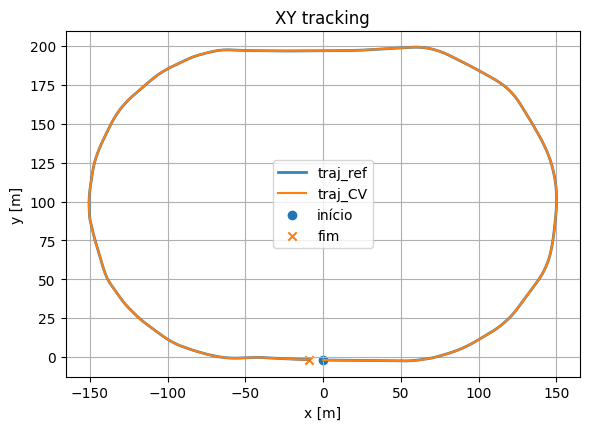

In [46]:
x_cv = X[:M+1, 2]   # x do controlador (CV)
y_cv = X[:M+1, 3]   # y do controlador (CV)
x_r  = x_ref[:M+1]  # x de referência
y_r  = y_ref[:M+1]  # y de referência

plt.figure(figsize=(6,6))
plt.plot(x_r,  y_r,  label='traj_ref', linewidth=2, alpha=0.9)
plt.plot(x_cv, y_cv, label='traj_CV',  linewidth=1.5)
# marcos de início/fim (opcional)
plt.scatter([x_r[0]], [y_r[0]], marker='o', label='início')
plt.scatter([x_r[-1]],[y_r[-1]], marker='x', label='fim')

plt.gca().set_aspect('equal', adjustable='box')  # escala igual em x e y
plt.xlabel('x [m]'); plt.ylabel('y [m]')
plt.title('XY tracking')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# Speed-Steer Controller

In [ ]:
def identify_bicycle_greybox_plus_speed(t, speed_cmd, steer_cmd,
                                  vx_world_meas, yaw_meas, x_meas, y_meas,
                                  v_body_meas=None,           # <-- NOVO (opcional)
                                  L0=1.75, tau_v0=0.5,
                                  w_vx=5.0, w_v=2.0, w_psi=10.0, w_xy=0.2):
    import numpy as np
    from gekko import GEKKO

    t = np.asarray(t, float); t = t - t[0]
    m = GEKKO(remote=False); m.time = list(t)

    # Entradas conhecidas
    u_v = m.Param(value=list(speed_cmd))
    u_d = m.Param(value=list(steer_cmd))

    # Medidas (ψ deve vir unwrapped)
    vx_p  = m.Param(value=list(vx_world_meas))
    psi_p = m.Param(value=list(yaw_meas))
    x_p   = m.Param(value=list(x_meas))
    y_p   = m.Param(value=list(y_meas))
    v_p   = None
    if v_body_meas is not None:
        v_p = m.Param(value=list(v_body_meas))

    # Parâmetros a estimar (FVs)
    tau_acc  = m.FV(value=0.20, lb=0.02, ub=3.0);  tau_acc.STATUS  = 1
    tau_str  = m.FV(value=0.15, lb=0.02, ub=3.0);  tau_str.STATUS  = 1
    tau_v    = m.FV(value=tau_v0, lb=0.05, ub=5.0);tau_v.STATUS    = 1
    L_eff    = m.FV(value=L0,    lb=1.0,  ub=4.0); L_eff.STATUS    = 1
    k_del    = m.FV(value=1.0,   lb=0.5,  ub=2.0); k_del.STATUS    = 1
    k_b1     = m.FV(value=0.0,   lb=-0.6, ub=0.6); k_b1.STATUS     = 1
    k_b3     = m.FV(value=0.0,   lb=-1.0, ub=1.0); k_b3.STATUS     = 1
    psi_bias = m.FV(value=0.0,   lb=-0.3, ub=0.3); psi_bias.STATUS = 1


    v   = m.Var(value=float(vx_world_meas[0]), lb=-10, ub=10)  
    psi = m.Var(value=float(yaw_meas[0]))
    xg  = m.Var(value=float(x_meas[0]))
    yg  = m.Var(value=float(y_meas[0]))
    uva = m.Var(value=float(speed_cmd[0]), lb=-10, ub=10)     
    da  = m.Var(value=0.0,                 lb=-0.8, ub=0.8)    

    m.Equation(uva.dt() == (u_v - uva)/tau_acc)
    m.Equation(da.dt()  == (u_d - da)/tau_str)

    m.Equation(v.dt()   == (uva - v)/tau_v)
    m.Equation(psi.dt() == (v/L_eff) * m.tan(k_del*da))
    beta = m.Intermediate(k_b1*da + k_b3*da**3)
    m.Equation(xg.dt()  == v*m.cos(psi + psi_bias + beta))
    m.Equation(yg.dt()  == v*m.sin(psi + psi_bias + beta))

    vx_hat_m = m.Intermediate( v*m.cos(psi + psi_bias + beta) )
    m.Minimize(w_vx * (vx_hat_m - vx_p)**2)
    if v_p is not None:
        m.Minimize(w_v * (v - v_p)**2)      # <-- NOVO
    m.Minimize(w_psi* (psi - psi_p)**2)
    m.Minimize(w_xy * ((xg - x_p)**2 + (yg - y_p)**2))

    m.Minimize(1e-6*((tau_acc-0.2)**2 + (tau_str-0.15)**2 + (tau_v-tau_v0)**2 +
                     (L_eff-L0)**2 + (k_del-1.0)**2 + k_b1**2 + k_b3**2 + psi_bias**2))

    # Solver
    m.options.IMODE=6; m.options.NODES=3; m.options.SOLVER=3
    m.options.SCALING=1; m.options.MAX_ITER=300
    m.solver_options = ['print_level 0','max_iter 300','tol 1e-6','acceptable_tol 1e-4']

    m.solve(disp=False)

    pars = {
        'tau_acc': float(tau_acc.VALUE[0]),
        'tau_str': float(tau_str.VALUE[0]),
        'tau_v'  : float(tau_v.VALUE[0]),
        'L_eff'  : float(L_eff.VALUE[0]),
        'k_del'  : float(k_del.VALUE[0]),
        'k_b1'   : float(k_b1.VALUE[0]),
        'k_b3'   : float(k_b3.VALUE[0]),
        'psi_bias':float(psi_bias.VALUE[0]),
    }

    # Trajetórias previstas
    v_hat    = np.fromiter(v.VALUE,   float)
    psi_hat  = np.fromiter(psi.VALUE, float)
    x_hat    = np.fromiter(xg.VALUE,  float)
    y_hat    = np.fromiter(yg.VALUE,  float)
    da_hat   = np.fromiter(da.VALUE,  float)

    # projeção para o mundo (mesma grandeza de vx_world_meas)
    beta_hat = pars['k_b1']*da_hat + pars['k_b3']*(da_hat**3)
    vx_hat   = v_hat * np.cos(psi_hat + pars['psi_bias'] + beta_hat)

    return pars, (v_hat, psi_hat, x_hat, y_hat, vx_hat)


Parâmetros: {'tau_acc': 0.053690972223, 'tau_str': 0.36371978163, 'tau_v': 1.2296913679, 'L_eff': 1.0, 'k_del': 0.594227598, 'k_b1': 0.6, 'k_b3': 1.0, 'psi_bias': -0.014286499961}
RMSE vx(world): 0.180 m/s
RMSE ψ:         0.057 rad
RMSE x:         1.274 m
RMSE y:         0.821 m
RMSE v(body):   0.163 m/s


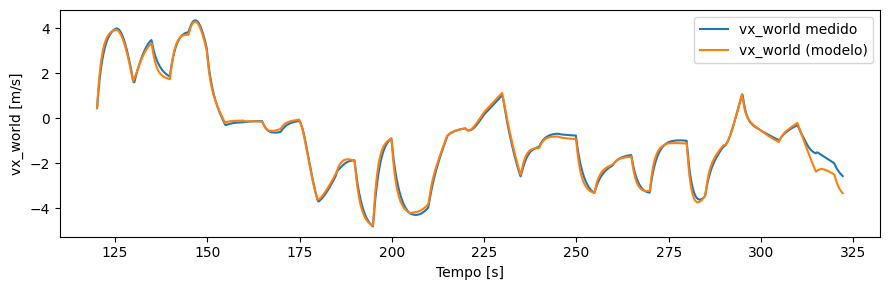

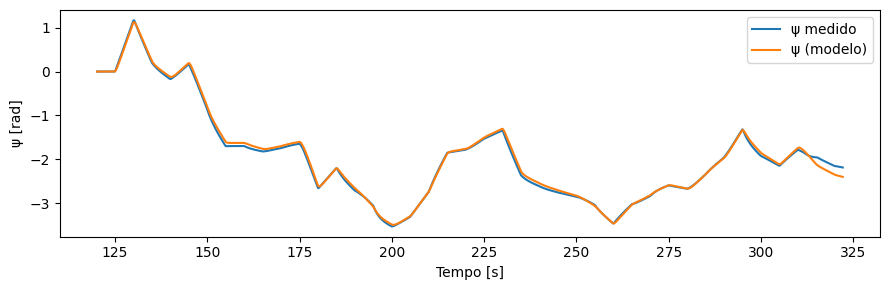

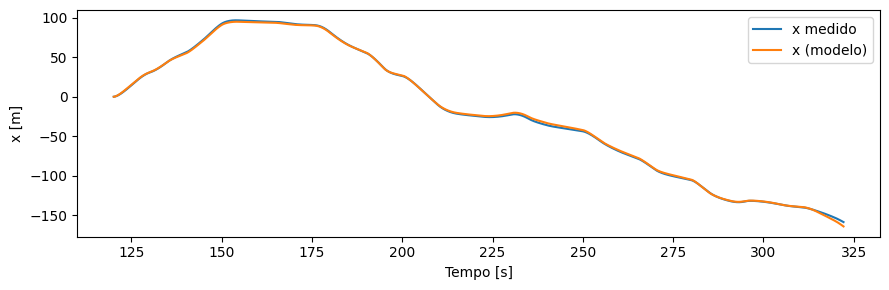

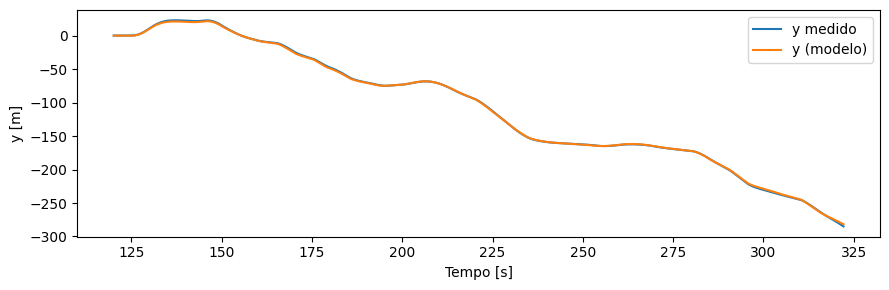

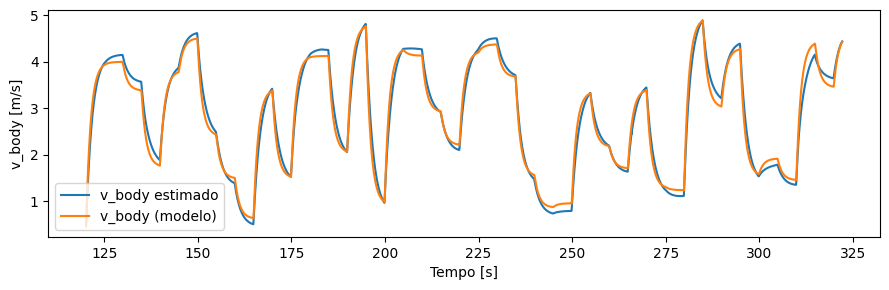

In [ ]:
t        = np.asarray(t_st, float)
speed    = u_st['speed_cmd'].to_numpy().astype(float)
steer    = u_st['steering_cmd'].to_numpy().astype(float)
yaw_meas = np.unwrap(y_st['yaw'].to_numpy().astype(float))
x_meas   = y_st['x'].to_numpy().astype(float)
y_meas   = y_st['y'].to_numpy().astype(float)

vx_world_meas = y_st['v_measured'].to_numpy().astype(float)


mask = (np.isfinite(t) & np.isfinite(speed) & np.isfinite(steer) &
        np.isfinite(vx_world_meas) & np.isfinite(yaw_meas) &
        np.isfinite(x_meas) & np.isfinite(y_meas))
t, speed, steer, vx_world_meas, yaw_meas, x_meas, y_meas = \
    t[mask], speed[mask], steer[mask], vx_world_meas[mask], \
    yaw_meas[mask], x_meas[mask], y_meas[mask]

idx = slice(0, len(t))  


vx_w = np.gradient(x_meas, t)
vy_w = np.gradient(y_meas, t)
v_body_est = vx_w*np.cos(yaw_meas) + vy_w*np.sin(yaw_meas)

pars, (v_hat, psi_hat, x_hat, y_hat, vx_hat) = identify_bicycle_greybox_plus_speed(
    t=t[idx],
    speed_cmd=speed[idx],
    steer_cmd=steer[idx],
    vx_world_meas=vx_world_meas[idx],
    yaw_meas=yaw_meas[idx],
    x_meas=x_meas[idx],
    y_meas=y_meas[idx],
    v_body_meas=v_body_est[idx],   
    L0=1.75, tau_v0=0.5,
    w_vx=5.0, w_v=2.0, w_psi=10.0, w_xy=0.2
)
print('Parameters:', pars)


def rmse(a,b):
    a,b = np.asarray(a), np.asarray(b)
    return float(np.sqrt(np.mean((a-b)**2)))

tt = t[idx]
print(f'RMSE vx(world): {rmse(vx_world_meas[idx], vx_hat):.3f} m/s')
print(f'RMSE ψ:         {rmse(yaw_meas[idx],       psi_hat):.3f} rad')
print(f'RMSE x:         {rmse(x_meas[idx],         x_hat):.3f} m')
print(f'RMSE y:         {rmse(y_meas[idx],         y_hat):.3f} m')

print(f'RMSE v(body):   {rmse(v_body_est[idx],     v_hat):.3f} m/s')

# --- 4) Plots de validação ---
plt.figure(figsize=(9,3))
plt.plot(tt, vx_world_meas[idx], label='vx_world measured')
plt.plot(tt, vx_hat,              label='vx_world (model)')
plt.xlabel('Time [s]'); plt.ylabel('vx_world [m/s]')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3))
plt.plot(tt, yaw_meas[idx], label='ψ measured')
plt.plot(tt, psi_hat,       label='ψ (model)')
plt.xlabel('Time [s]'); plt.ylabel('ψ [rad]')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3))
plt.plot(tt, x_meas[idx], label='x measured')
plt.plot(tt, x_hat,       label='x (model)')
plt.xlabel('Time [s]'); plt.ylabel('x [m]')
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,3))
plt.plot(tt, y_meas[idx], label='y measured')
plt.plot(tt, y_hat,       label='y (model)')
plt.xlabel('Time [s]'); plt.ylabel('y [m]')
plt.legend(); plt.tight_layout(); plt.show()

# Opcional: se passou v_body_est, plote também v (corpo)
plt.figure(figsize=(9,3))
plt.plot(tt, v_body_est[idx], label='v_body estimado')
plt.plot(tt, v_hat,           label='v_body (model)')
plt.xlabel('Time [s]'); plt.ylabel('v_body [m/s]')
plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
def mpc_xypsi(t, pars, x_ref, y_ref, psi_ref, v_ref,
              Ts=None, Np=20, mode='steer_only',
              steer_bounds=(-0.6,0.6), dmax_steer=0.20,
              spd_bounds=(0.0,8.0), dmax_spd=0.5,
              w_pos=1.0, w_yaw=0.3, w_v=0.2,
              w_u_steer=1e-6, w_u_spd=1e-6):
    import numpy as np
    from gekko import GEKKO
    assert mode in ('steer_only','speed_steer')

    t = np.asarray(t, float)
    if Ts is None:
        Ts = float(np.median(np.diff(t)))
    H = np.linspace(0.0, Np*Ts, Np+1)

    if pars is None:
        pars = dict(tau_acc=0.20, tau_str=0.15, tau_v=0.5, L_eff=1.75,
                    k_del=1.0, k_b1=0.0, k_b3=0.0, psi_bias=0.0)

    m = GEKKO(remote=False)
    m.time = H
    m.options.IMODE=6; m.options.NODES=2; m.options.SOLVER=3
    m.options.SCALING=1; m.options.MAX_ITER=120
    m.solver_options=['print_level 0','max_iter 120','tol 1e-6',
                      'acceptable_tol 1e-4','linear_solver ma27']

    tau_acc = m.Param(value=pars['tau_acc'])
    tau_str = m.Param(value=pars['tau_str'])
    tau_v   = m.Param(value=pars['tau_v'])
    L_eff   = m.Param(value=pars['L_eff'])
    k_del   = m.Param(value=pars['k_del'])
    k_b1    = m.Param(value=pars['k_b1'])
    k_b3    = m.Param(value=pars['k_b3'])
    psi_b   = m.Param(value=pars['psi_bias'])

    x_sp   = m.Param(value=np.array(x_ref[:Np+1],   float))
    y_sp   = m.Param(value=np.array(y_ref[:Np+1],   float))
    psi_sp = m.Param(value=np.array(psi_ref[:Np+1], float))
    v_sp   = m.Param(value=np.array(v_ref[:Np+1],   float))

    v   = m.Var(value=float(v_ref[0]), lb=-10, ub=10)
    psi = m.Var(value=float(psi_ref[0]))
    xg  = m.Var(value=float(x_ref[0]))
    yg  = m.Var(value=float(y_ref[0]))
    uva = m.Var(value=float(v_ref[0]), lb=-10, ub=10)     # atuador de velocidade
    da  = m.Var(value=0.0,             lb=steer_bounds[0], ub=steer_bounds[1])


    delt_u = m.MV(value=0.0, lb=steer_bounds[0], ub=steer_bounds[1])
    delt_u.STATUS = 1; delt_u.DMAX = dmax_steer; delt_u.DCOST = 1.0

    if mode=='speed_steer':
        spd_u = m.MV(value=float(v_ref[0]), lb=spd_bounds[0], ub=spd_bounds[1])
        spd_u.STATUS = 1; spd_u.DMAX = dmax_spd; spd_u.DCOST = 1.0
        spd_src = spd_u
    else:
        spd_param = m.Param(value=np.array(v_ref[:Np+1], float))
        spd_src   = spd_param

    m.Equation(uva.dt() == (spd_src - uva)/tau_acc)
    m.Equation(da.dt()  == (delt_u - da)/tau_str)
    m.Equation(v.dt()   == (uva - v)/tau_v)
    m.Equation(psi.dt() == (v/L_eff) * m.tan(k_del*da))
    beta = m.Intermediate(k_b1*da + k_b3*da**3)
    m.Equation(xg.dt()  == v*m.cos(psi + psi_b + beta))
    m.Equation(yg.dt()  == v*m.sin(psi + psi_b + beta))

    ex = m.Intermediate(xg - x_sp)
    ey = m.Intermediate(yg - y_sp)
    dpsi = m.Intermediate(psi - psi_sp)
    m.Minimize(w_pos*(ex**2 + ey**2))
    m.Minimize(w_yaw*(1 - m.cos(dpsi)))
    m.Minimize(w_u_steer*(delt_u**2))
    if mode=='speed_steer':
        m.Minimize(w_v*(v - v_sp)**2)
        m.Minimize(w_u_spd*(spd_u**2))

    def set_refs_and_speed(xseg, yseg, psiseg, vseg):
        x_sp.value   = np.array(xseg[:Np+1],   float)
        y_sp.value   = np.array(yseg[:Np+1],   float)
        psi_sp.value = np.array(psiseg[:Np+1], float)
        v_sp.value   = np.array(vseg[:Np+1],   float)
        if mode=='steer_only':
            spd_param.value = np.array(vseg[:Np+1], float)

    def solve_first_move(v0, psi0, x0, y0, uva0, da0):
        v.value, psi.value, xg.value, yg.value = float(v0), float(psi0), float(x0), float(y0)
        uva.value, da.value = float(uva0), float(da0)
        head_err = float((psi_sp.value[min(5,Np)] - psi0 + np.pi)%(2*np.pi) - np.pi)
        d_guess  = float(np.clip(head_err, steer_bounds[0], steer_bounds[1]))
        delt_u.value = [d_guess]*(Np+1)
        if mode=='speed_steer':
            spd_u.value = list(np.clip(v_sp.value, spd_bounds[0], spd_bounds[1]))
        m.solve(disp=False)
        if mode=='speed_steer':
            return float(spd_u.NEWVAL), float(delt_u.NEWVAL)
        else:
            return float(v_sp.value[0]), float(delt_u.NEWVAL)

    return set_refs_and_speed, solve_first_move, dict(Ts=Ts, Np=Np, mode=mode)



In [ ]:
def load_wp_csv_with_speed(csv_path, Ts=0.1, use_csv_yaw=True,
                           speed_source='vref_body', v_min=0.2):
    import pandas as pd, numpy as np
    df = pd.read_csv(csv_path, header=None)
    df.columns = ['x','y','psi','v_world','vref_body']

    x   = df['x'].to_numpy(float)
    y   = df['y'].to_numpy(float)
    psi = (np.unwrap(df['psi'].to_numpy(float))
           if use_csv_yaw else np.unwrap(np.arctan2(np.gradient(y), np.gradient(x))))

    v_path = df['vref_body'].to_numpy(float) if speed_source=='vref_body' \
             else df['v_world'].to_numpy(float)
    v_path = np.clip(v_path, v_min, None)

    ds   = np.hypot(np.diff(x), np.diff(y))
    dt   = ds / np.maximum(v_path[:-1], v_min)
    t_wp = np.concatenate(([0.0], np.cumsum(dt)))

    if Ts is None:
        Ts = float(np.median(np.diff(t_wp))) if len(t_wp)>1 else 0.1
    t = np.arange(0.0, t_wp[-1] + 0.5*Ts, Ts)

    x_ref   = np.interp(t, t_wp, x)
    y_ref   = np.interp(t, t_wp, y)
    psi_ref = np.interp(t, t_wp, psi)    
    v_ref   = np.interp(t, t_wp, v_path)


    return t, x_ref, y_ref, psi_ref, v_ref, float(Ts)

csv_path = 'data/wps.csv'
t, x_ref, y_ref, psi_ref, v_ref_profile, Ts = load_wp_csv_with_speed(
    csv_path, Ts=0.05, use_csv_yaw=True, speed_source='vref_body'
)
print('v_ref range:', v_ref_profile.min(), '→', v_ref_profile.max())


v_ref range: 0.2 → 8.225572457042867


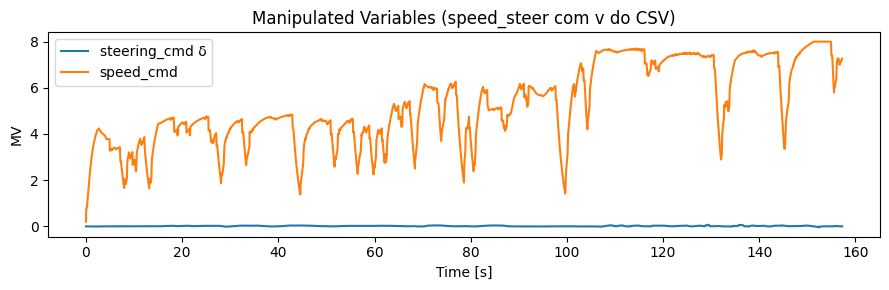

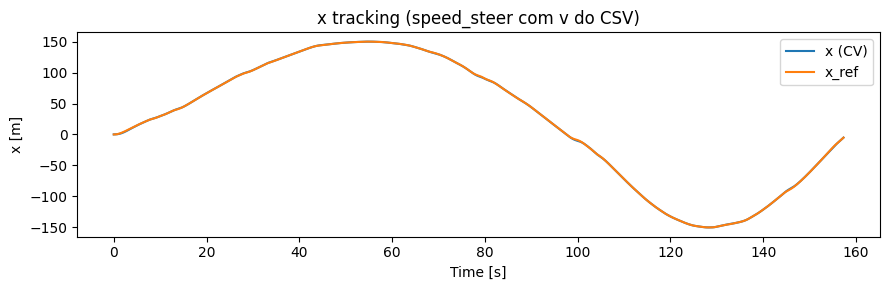

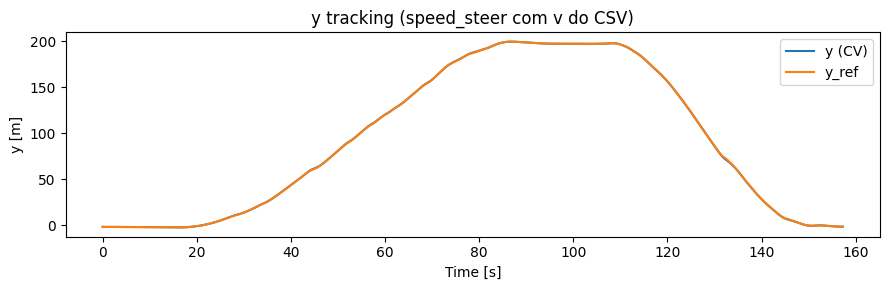

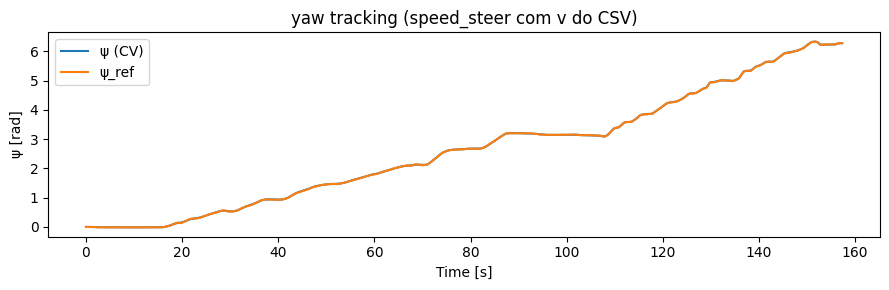

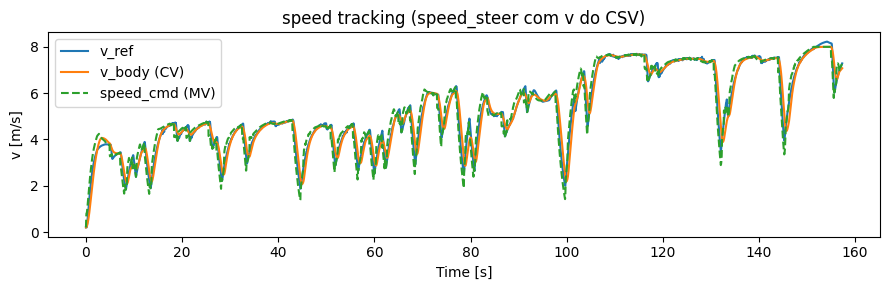

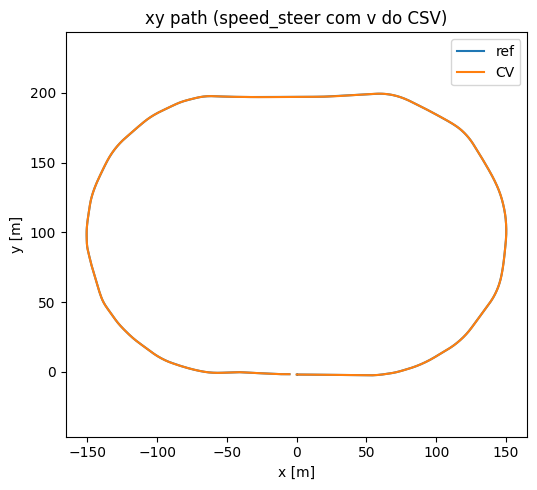

In [ ]:
pars = None
t, x_ref, y_ref, psi_ref, v_ref_profile, Ts = load_wp_csv_with_speed(
    'data/wps.csv', Ts=0.05, speed_source='vref_body'
)

res = run_and_plot_mpc(
    t=t, x_ref=x_ref, y_ref=y_ref, psi_ref=psi_ref,
    v_ref_profile=v_ref_profile, pars=pars, 
    Ts=Ts, Np=25, mode='speed_steer',
    spd_bounds=(0.0, 8.0), dmax_spd=0.6,
    w_pos=2.0, w_yaw=0.5, w_v=1.0,           
    title_tag='(speed_steer with v from CSV)'
)